#                                                   EDA

## Importing The Required Libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os

import pandas as pd
pd.set_option('display.max_columns', 100)

import seaborn as sns
sns.set(color_codes=True)

import datetime
import pickle

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.inspection import plot_partial_dependence

## Importing Our Dataset 

In [2]:
first_data = pd.read_csv('ml_case_training_data.csv')
second_data = pd.read_csv('ml_case_training_hist_data.csv')
output = pd.read_csv('ml_case_training_output.csv')

## Merging our first data with the output training set

In [3]:
joint_data = pd.DataFrame.merge(first_data, output, how='outer', on='id')
joint_data

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


## Historical Price Data

In [4]:
second_data

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,8/1/2015,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,9/1/2015,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,10/1/2015,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,11/1/2015,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


## Peeping into the merged set and drawing insights

In [5]:
joint_data.describe(include='all')

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,16096,6551,0.0,11878,1.609600e+04,1.609600e+04,1.609600e+04,16096,16094,3508,15939,16056,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16009,16093.000000,16096.000000
unique,16096,419,NaN,7,NaN,NaN,NaN,1961,371,1133,2307,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,2c8fba31407b3b646132cd02d02e8fdf,apdekpcbwosbxepsfxclislboipuxpop,NaN,foosdfpfkusacimwkcsosbicdxkicaua,NaN,NaN,NaN,2009-08-01,2016-02-01,2009-07-14,2015-11-01,2015-06-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,lxidpiddsbxsbosboudacockeimpuepw,NaN,NaN
freq,1,1577,NaN,7377,NaN,NaN,NaN,99,152,34,592,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13132,NaN,NaN,NaN,NaN,NaN,NaN,7825,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.948044e+05,3.191164e+04,1.946154e+04,NaN,NaN,NaN,NaN,NaN,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,NaN,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,NaN,20.604131,0.099093
std,NaN,NaN,NaN,NaN,6.795151e+05,1.775885e+05,8.235676e+04,NaN,NaN,NaN,NaN,NaN,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,NaN,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,NaN,21.772421,0.298796
min,NaN,NaN,NaN,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,NaN,NaN,NaN,NaN,NaN,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,NaN,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,5.906250e+03,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,NaN,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,NaN,12.500000,0.000000
50%,NaN,NaN,NaN,NaN,1.533250e+04,0.000000e+00,9.010000e+02,NaN,NaN,NaN,NaN,NaN,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,NaN,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,NaN,13.856000,0.000000
75%,NaN,NaN,NaN,NaN,5.022150e+04,0.000000e+00,4.127000e+03,NaN,NaN,NaN,NaN,NaN,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,NaN,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,NaN,19.800000,0.000000


The data contains activities of SME(Small and Medium Enterprise) customers including sales channel, consumption, dates, forecasts, contract type. There are lots of missing values.

The minimum consumption and forecasts for electricity and gas (yearly and monthly) are negative. This could mean that
the client companies are producing energy and therefore energy should be "returned", although it is unlikely and we will consider it as corrupted data.

 Highly skewed data when we look at the percentiles.

## Missing Values

In [6]:
pd.DataFrame({"Missing values (%)": first_data.isnull().sum()/len(first_data.index)*100})

,Missing values (%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In [7]:
pd.DataFrame({"Missing values (%)": second_data.isnull().sum()/len(second_data.index)*100})

,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


## Churn
Knowing churn rate

In [8]:
churn = joint_data[["id","churn"]]
# Rename columns for visualization purposes
churn.columns = ["Companies", "churn"]

In [9]:
# Defining Functio for Plots
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
     """
     Plot stacked bars with annotations
     """
     ax = dataframe.plot(kind="bar",
     stacked=True,
    figsize=size_,
    rot=rot_,
    title=title_)
     # Annotate bars
     annotate_stacked_bars(ax, textsize=14)
     # Rename legend
     plt.legend(["Retention", "Churn"], loc=legend_)
     # Labels
     plt.ylabel("Company base (%)")
     plt.show()
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
     """
     Add value annotations to the bars
     """
     # Iterate over the plotted rectanges/bars
     for p in ax.patches:
         # Calculate annotation
         value = str(round(p.get_height(),1))
         # If value is 0 do not annotate
         if value == '0.0':
             continue
         ax.annotate(value,
             ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
             color=colour,
            size=textsize,
             )


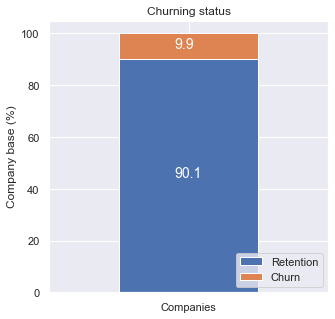

In [10]:
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")

Approximately 10% of the total customers have not churned

### SME Activities

In [11]:
activity = joint_data[["id","activity_new", "churn"]]
activity = activity.groupby([activity["activity_new"],
 activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

([], <a list of 0 Text xticklabel objects>)

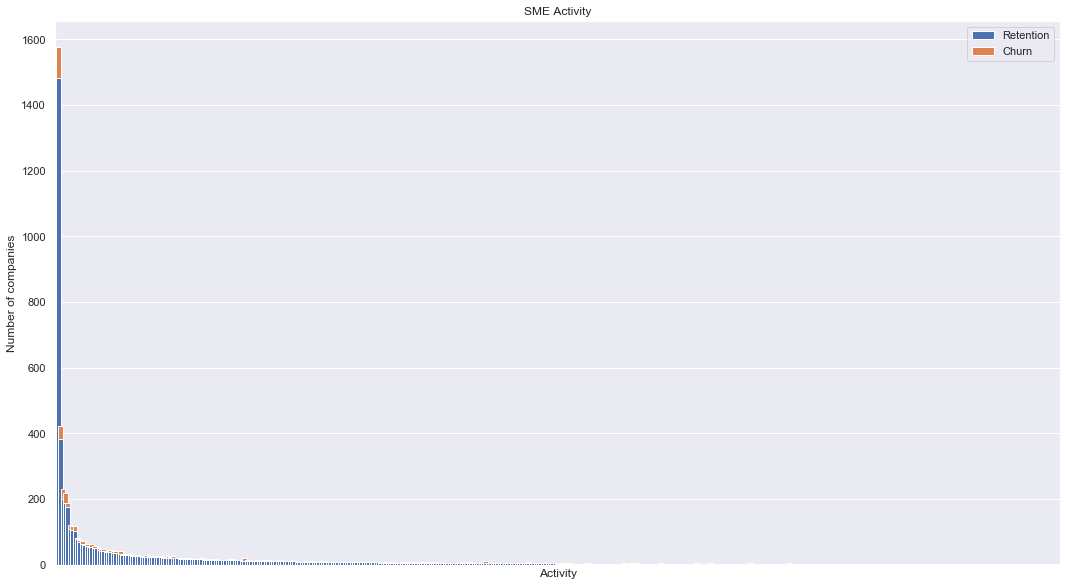

In [12]:
activity.plot(kind="bar",
              figsize=(18, 10),
              width=2,
              stacked=True,
              title="SME Activity")
# Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])

We see that churn is not related to any SME category in particular.
Let's take a look at it using percentages.

In [13]:
activity_total = activity.fillna(0)[0]+activity.fillna(0)[1]
activity_percentage = activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({"Percentage churn": activity_percentage,
             "Total companies": activity_total }).sort_values(by="Percentage churn",
             ascending=False)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.0,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.0,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.0,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.0,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.0,2.0
...,...,...
pudsxpkefiudxxfcumemocbpuklxiufa,0.0,8.0
ambaaxsxxwfuspsuabupewfpbbksmcoo,0.0,2.0
sbolemmfddlosupuwbcawusmbwmdmdfw,0.0,2.0


Our predictive model is likely to struggle accurately predicting the the SME activity due to the large number of categories and low
number of companies belonging to each category.

## Sales Channel

The sales channel seems to be an important feature when predecting the churning of a user.

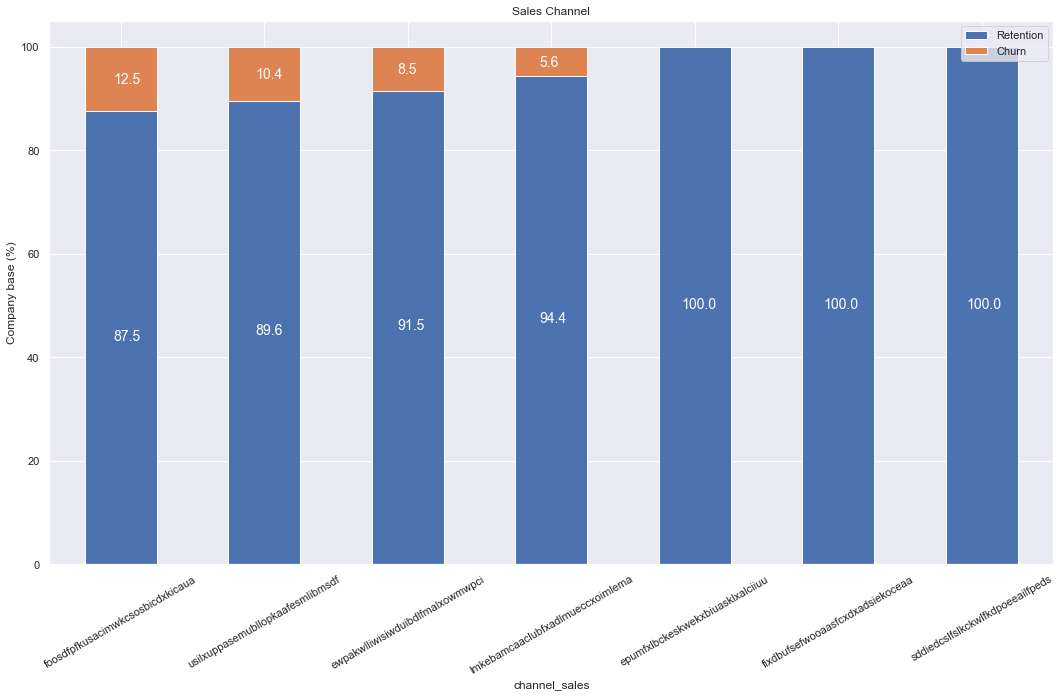

In [14]:
channel = joint_data[["id","channel_sales", "churn"]]
channel = channel.groupby([channel["channel_sales"],
                           channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

In [15]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage = channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage": channel_percentage,
              "Total companies": channel_total }).sort_values(by="Churn percentage",
               ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


## Consumption over the last year and last month

In [16]:
consumption = joint_data[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]

In [17]:
def plot_distribution(dataframe, column, ax, bins_=50):
     """
     Plot variable distirbution in a stacked histogram of churned or retained company
     """
     # Create a temporal dataframe with the data to be plot
     temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
     "Churn":dataframe[dataframe["churn"]==1][column]})
     # Plot the histogram
     temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
     # X-axis label
     ax.set_xlabel(column)
     # Change the x-axis to plain style
     ax.ticklabel_format(style='plain', axis='x')

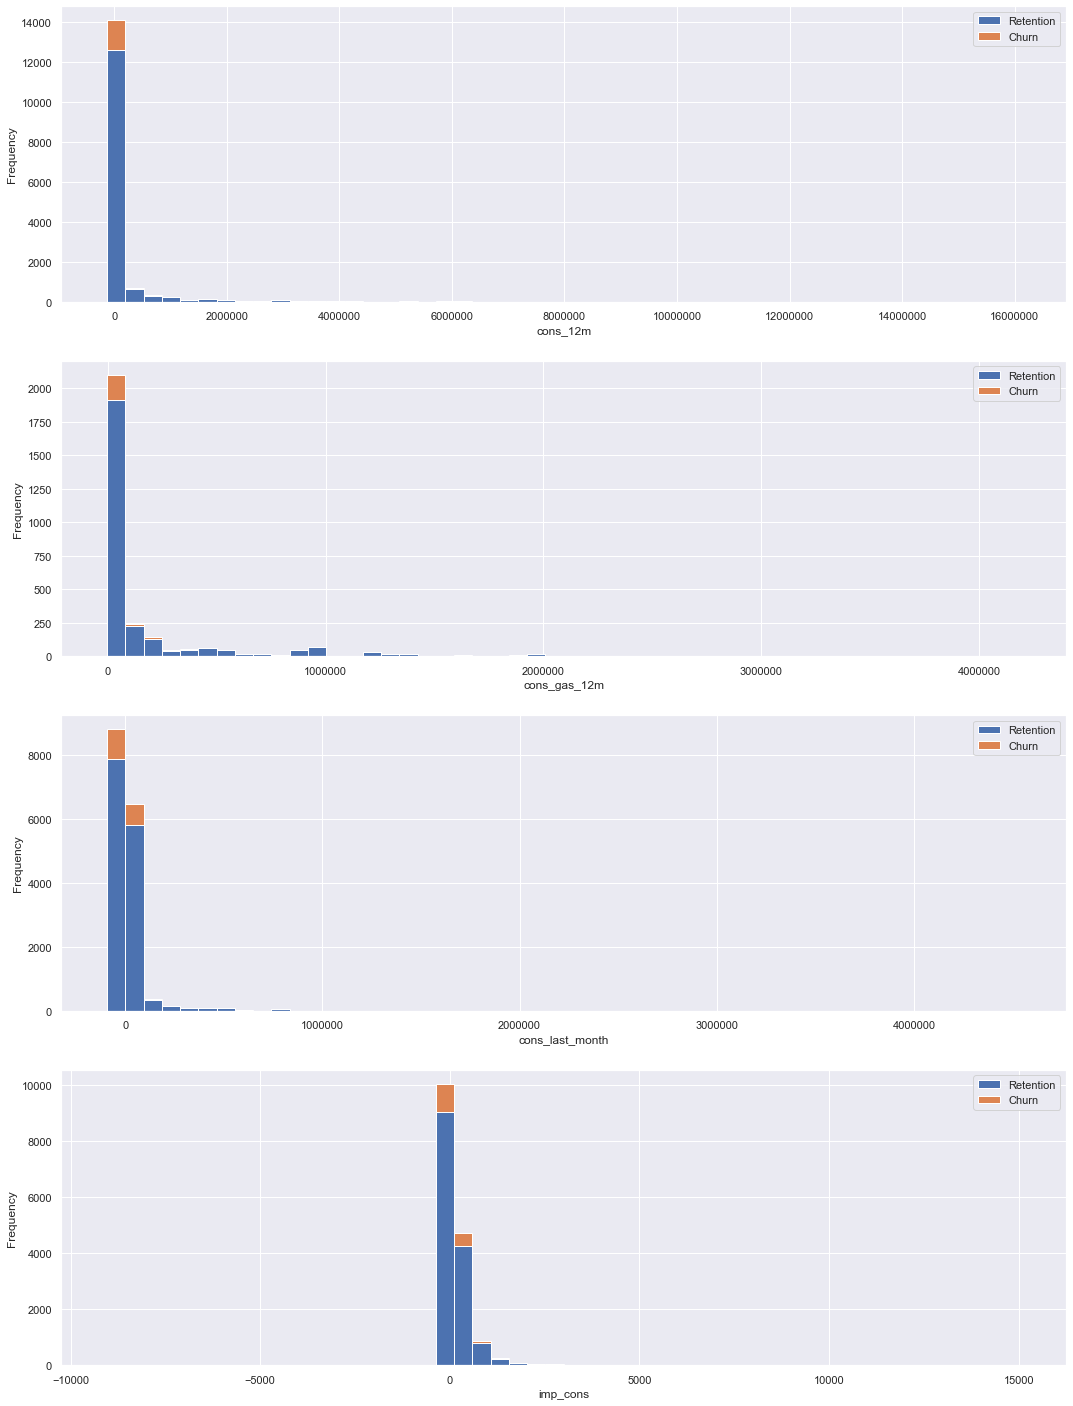

In [18]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] == "t"], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

We can clearly see in here that the consumption data is highly skewed to the right.
The values on the higher end and lower ends of the distribution are likely to be outliers. We would use a box plot to visualise the outliers in more detail.

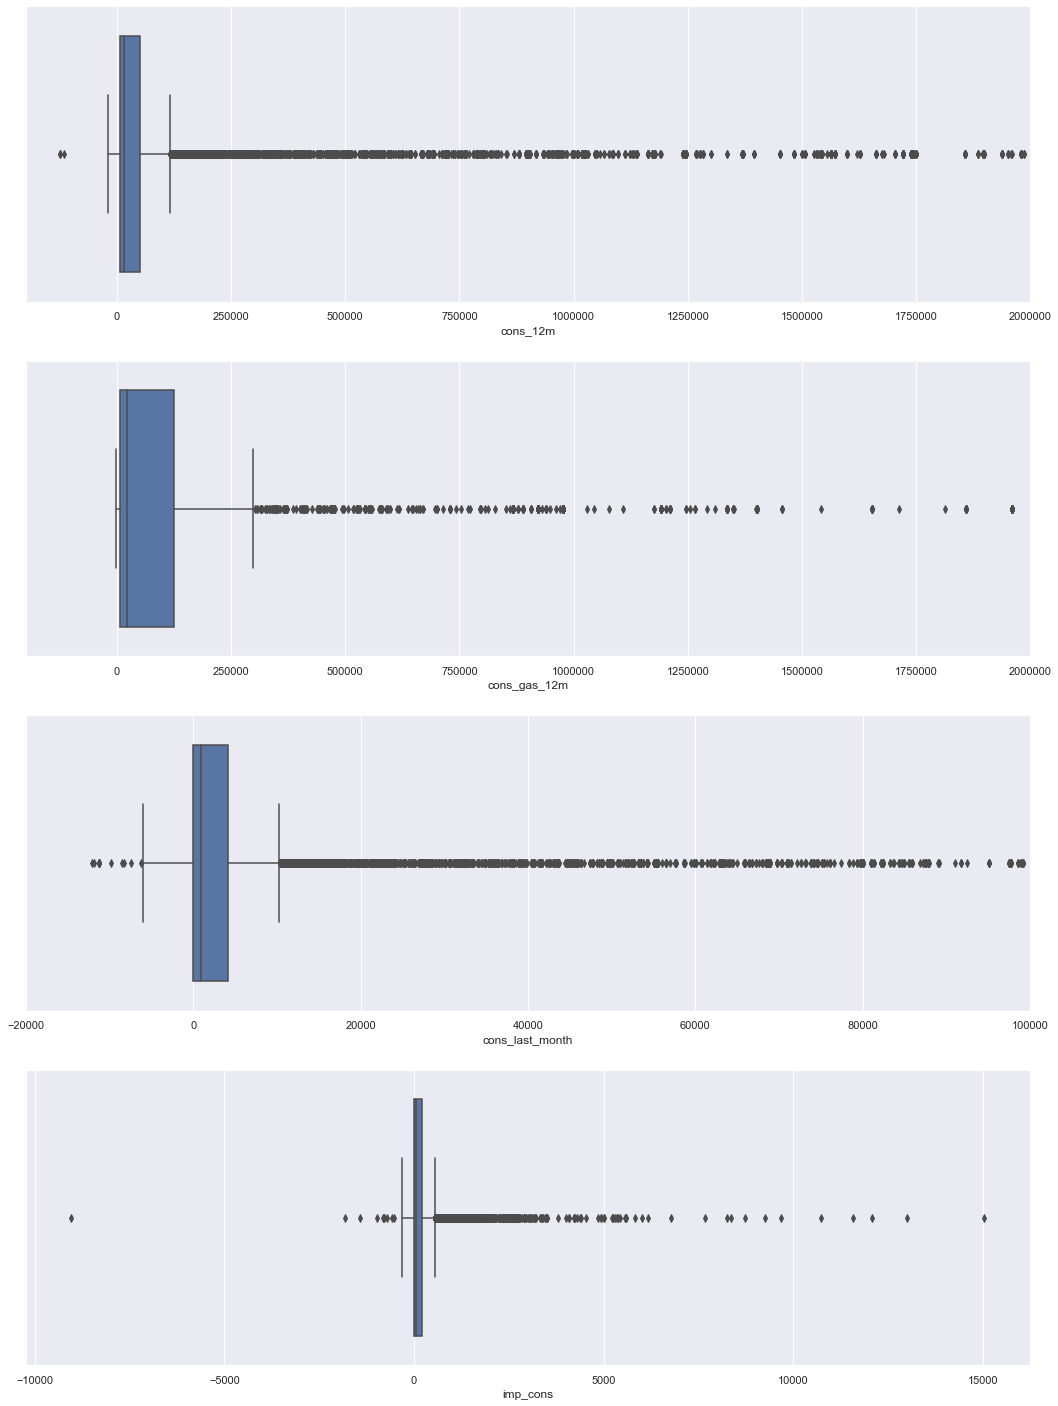

In [19]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
 ax.ticklabel_format(style='plain', axis='x')
# Set x-axis limit
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)
plt.show()

Our outliers are crystal clear now that boxplot has revealed it to us, we'll deal with them later.

## Dates

In [20]:
dates = joint_data[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()

In [21]:
# Transforming date features to datetime types
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d')
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')

## Visualizing the date features

In [22]:
def plot_dates(dataframe, column, fontsize_=12):
 """
 Plot monthly churn and retention distribution
 """
 # Group by month
 temp = dataframe[[column,
 "churn",
"id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
 # Plot
 ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
 # Change x-axis labels to months
 ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
 # Change xlabel size
 plt.xticks(fontsize=fontsize_)
 # Rename y-axis
 plt.ylabel("Number of companies")
 # Rename legend
 plt.legend(["Retention", "Churn"], loc="upper right")
 plt.show()

def line_format(label):
     """
     Convert time label to the format of pandas line plot
     """
     month = label.month_name()[:1]
     if label.month_name() == "January":
         month += f'\n{label.year}'
         return month

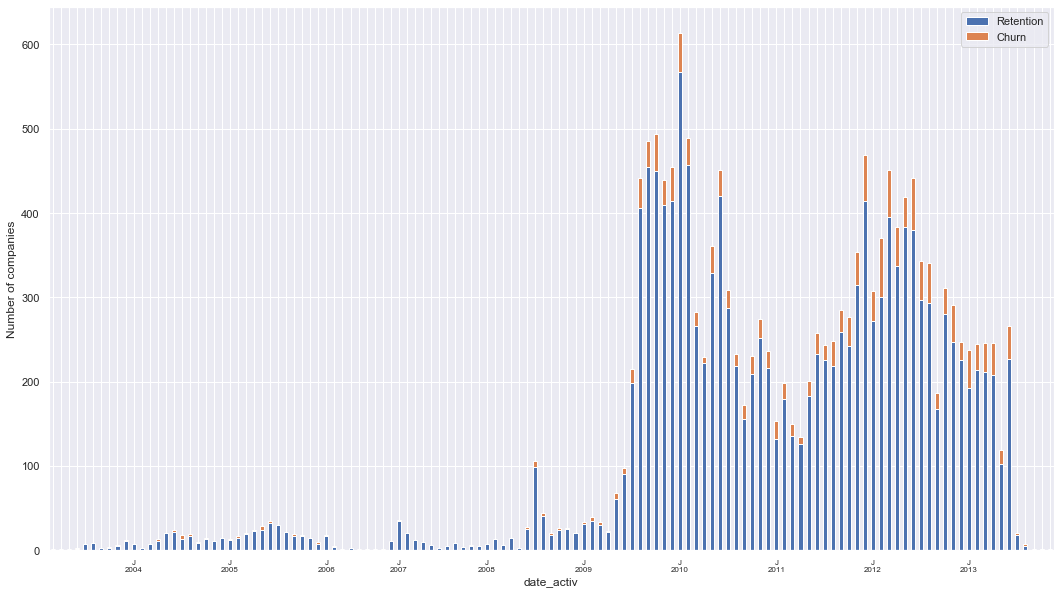

In [23]:
plot_dates(dates, "date_activ", fontsize_=8)

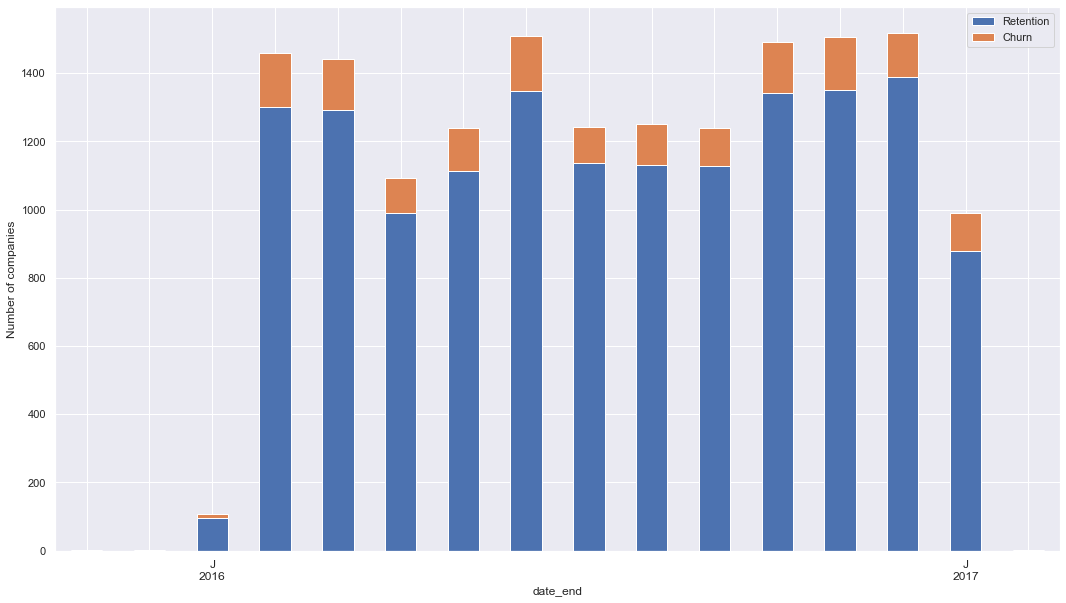

In [24]:
plot_dates(dates, "date_end")

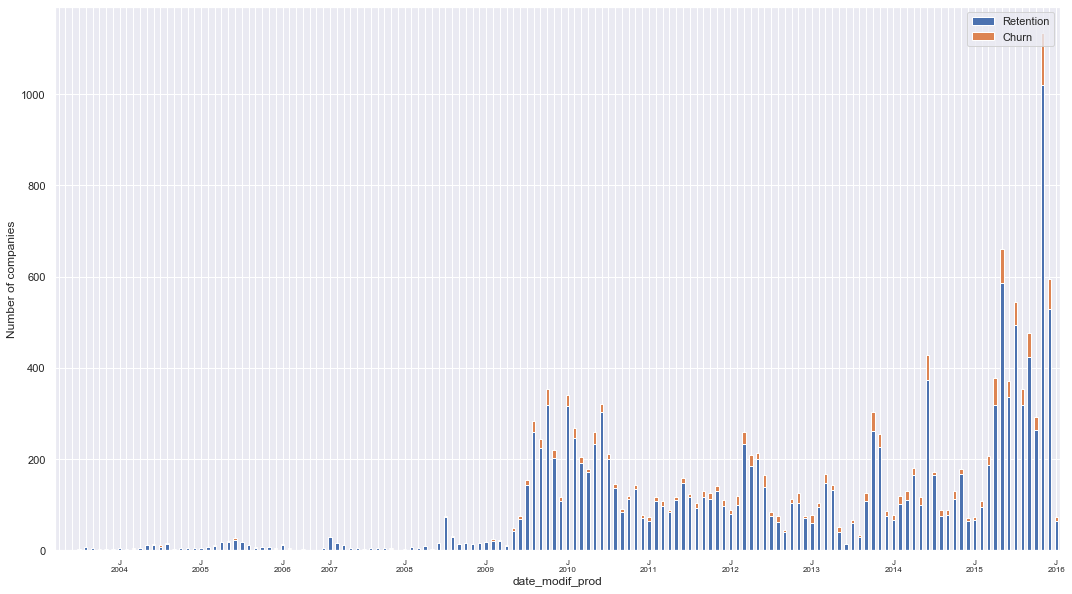

In [25]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

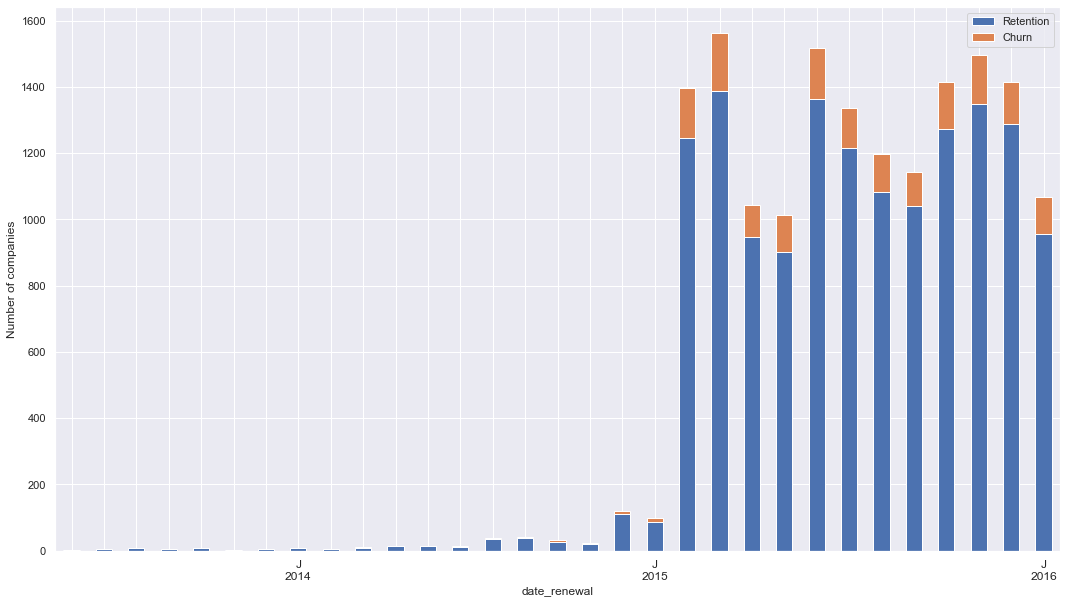

In [26]:
plot_dates(dates, "date_renewal")

## Forecast

In [27]:
forecast = joint_data[["id","forecast_base_bill_ele","forecast_base_bill_year",
                  "forecast_bill_12m","forecast_cons","forecast_cons_12m",
                  "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
                  "forecast_price_energy_p1","forecast_price_energy_p2",
                  "forecast_price_pow_p1","churn"]]

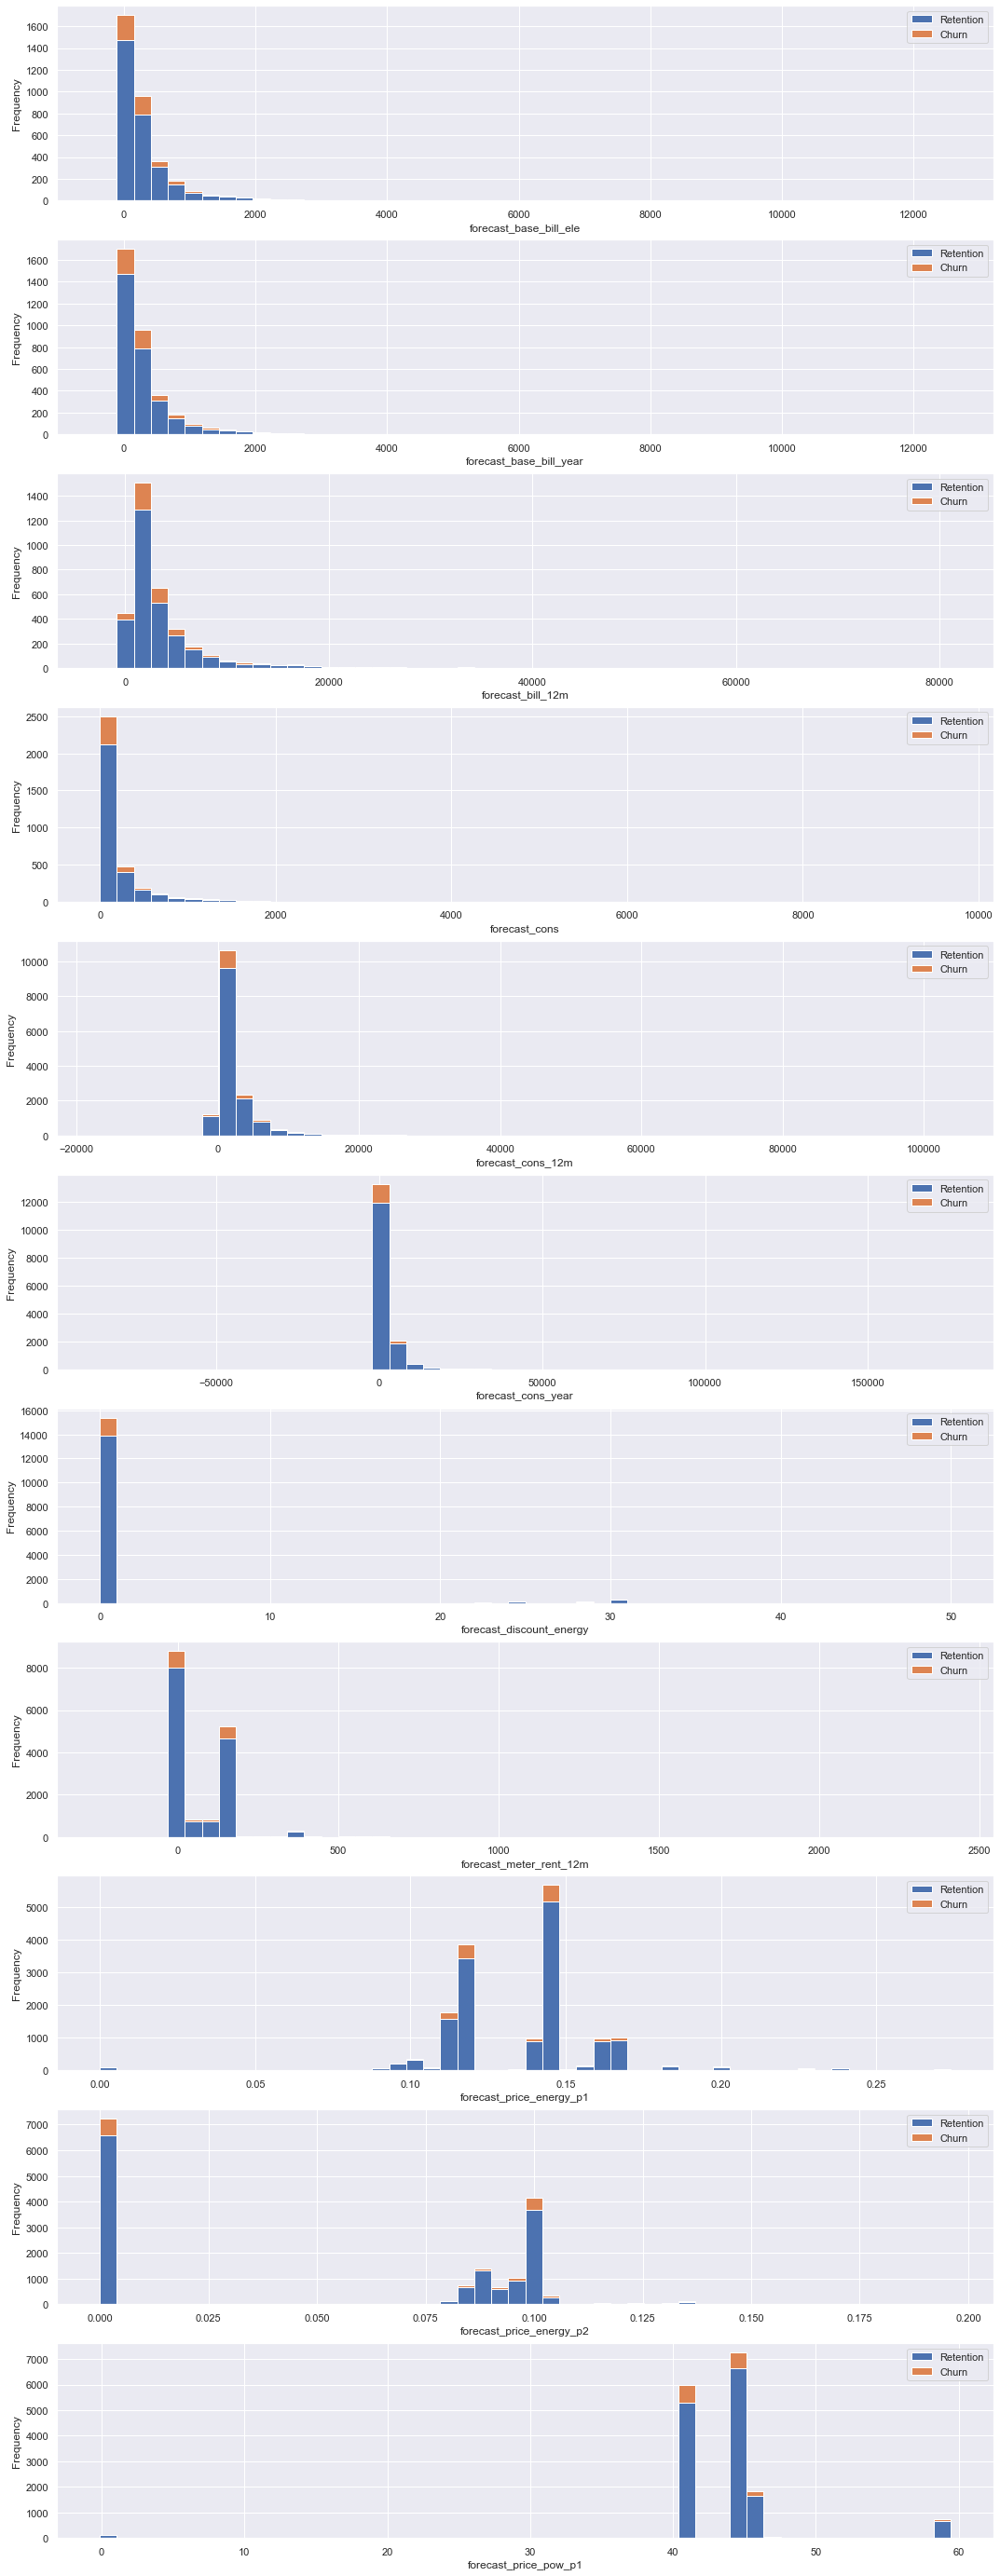

In [28]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
plot_distribution(joint_data, "forecast_base_bill_ele", axs[0])
plot_distribution(joint_data, "forecast_base_bill_year", axs[1])
plot_distribution(joint_data, "forecast_bill_12m", axs[2])
plot_distribution(joint_data, "forecast_cons", axs[3])
plot_distribution(joint_data, "forecast_cons_12m", axs[4])
plot_distribution(joint_data, "forecast_cons_year", axs[5])
plot_distribution(joint_data, "forecast_discount_energy", axs[6])
plot_distribution(joint_data, "forecast_meter_rent_12m", axs[7])
plot_distribution(joint_data, "forecast_price_energy_p1", axs[8])
plot_distribution(joint_data, "forecast_price_energy_p2", axs[9])
plot_distribution(joint_data, "forecast_price_pow_p1", axs[10])

A lot of variables are also highly skewed, this would be corrected later.

## Contract Type

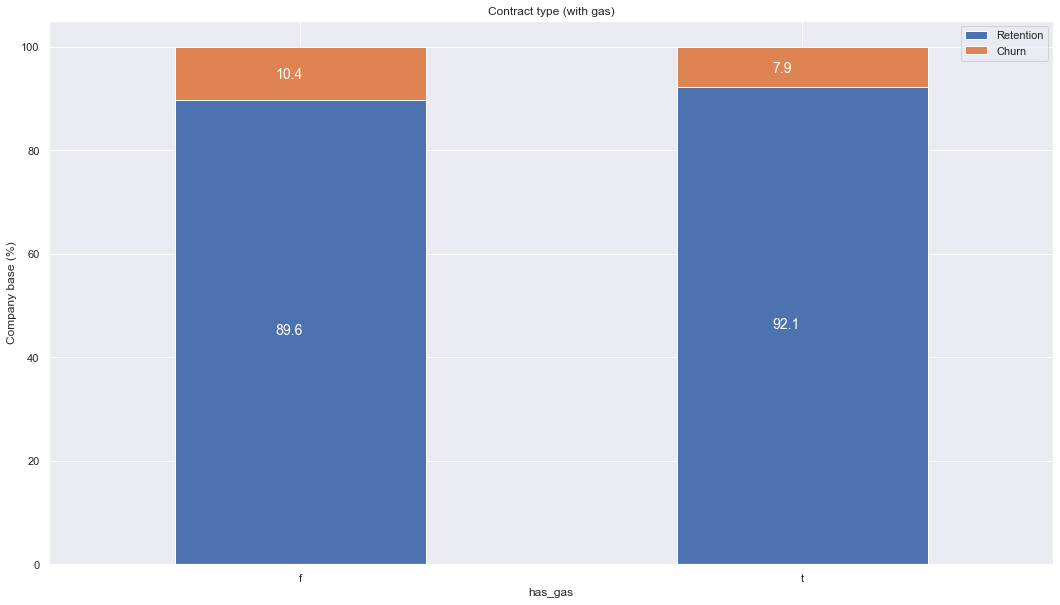

In [29]:
contract_type = joint_data[["id", "has_gas", "churn"]]
contract = contract_type.groupby([contract_type["churn"],
                                  contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

## Margin

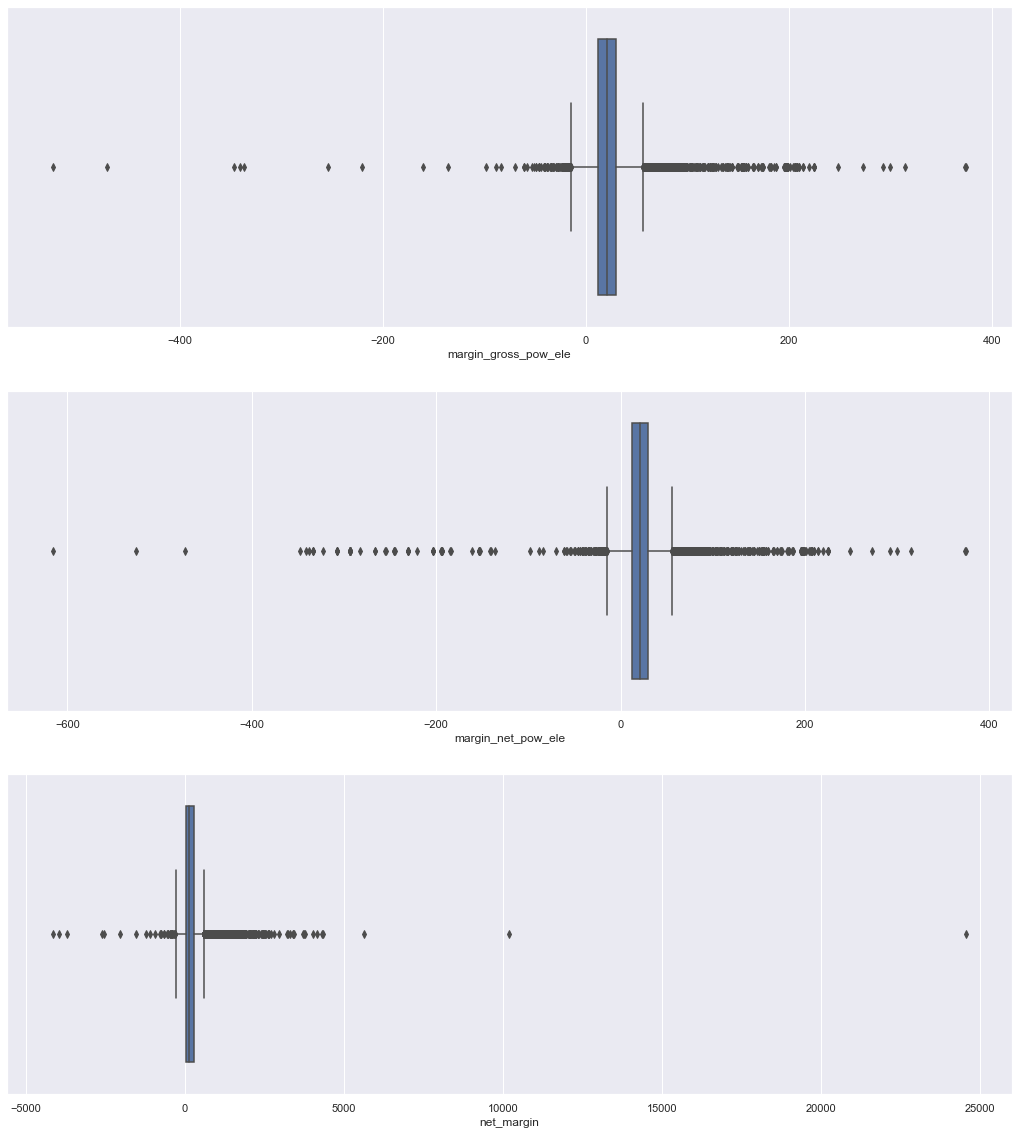

In [30]:
margin = joint_data[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

## Subscribed Power

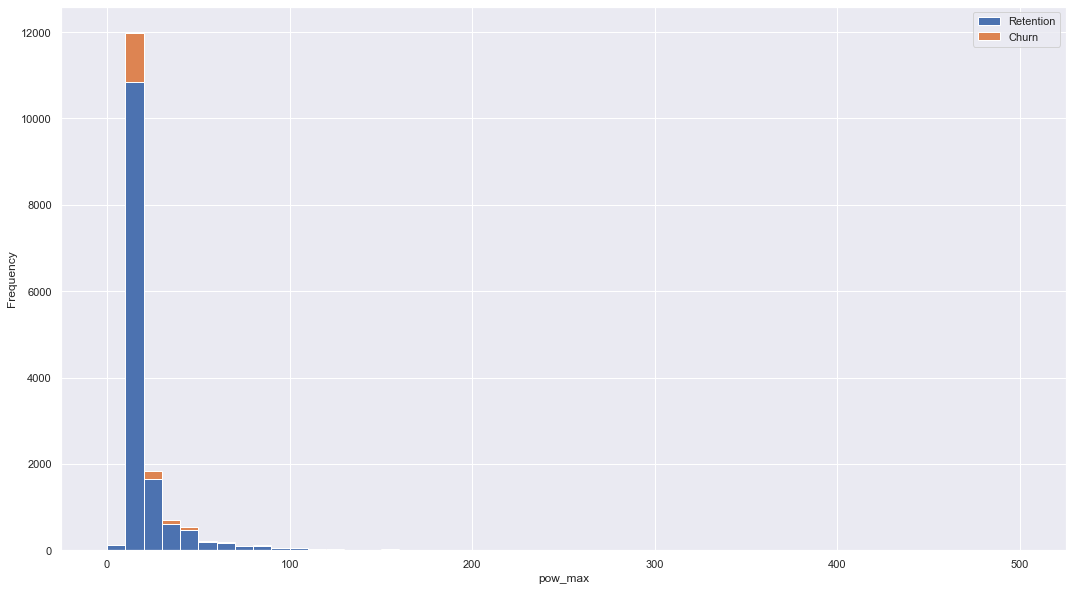

In [31]:
power = joint_data[["id","pow_max", "churn"]].fillna(0)
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

## Data Cleaning

### Dealing with Missing Values

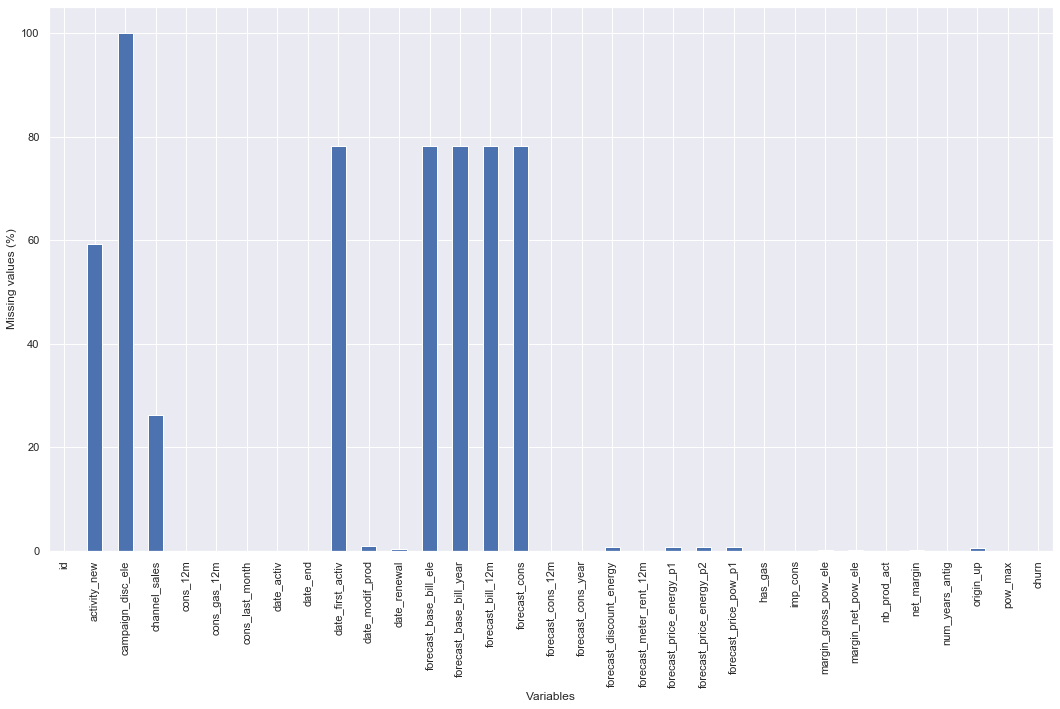

In [32]:
# Plot missing data
(joint_data.isnull().sum()/len(joint_data.index)*100).plot(kind="bar", figsize=(18,10))
# Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

In [33]:
# Removing columns whose missing data is more than 60%
joint_data.drop(columns=["campaign_disc_ele", "date_first_activ",
                         "forecast_base_bill_ele","forecast_base_bill_year",
                         "forecast_bill_12m", "forecast_cons"], inplace=True)

In [34]:
# Dealing with missing dates
joint_data.loc[joint_data["date_modif_prod"].isnull(),"date_modif_prod"] = joint_data["date_modif_prod"].value_counts().index[0]
joint_data.loc[joint_data["date_end"].isnull(),"date_end"] = joint_data["date_end"].value_counts().index[0]
joint_data.loc[joint_data["date_renewal"].isnull(),"date_renewal"] = joint_data["date_renewal"].value_counts().index[0]

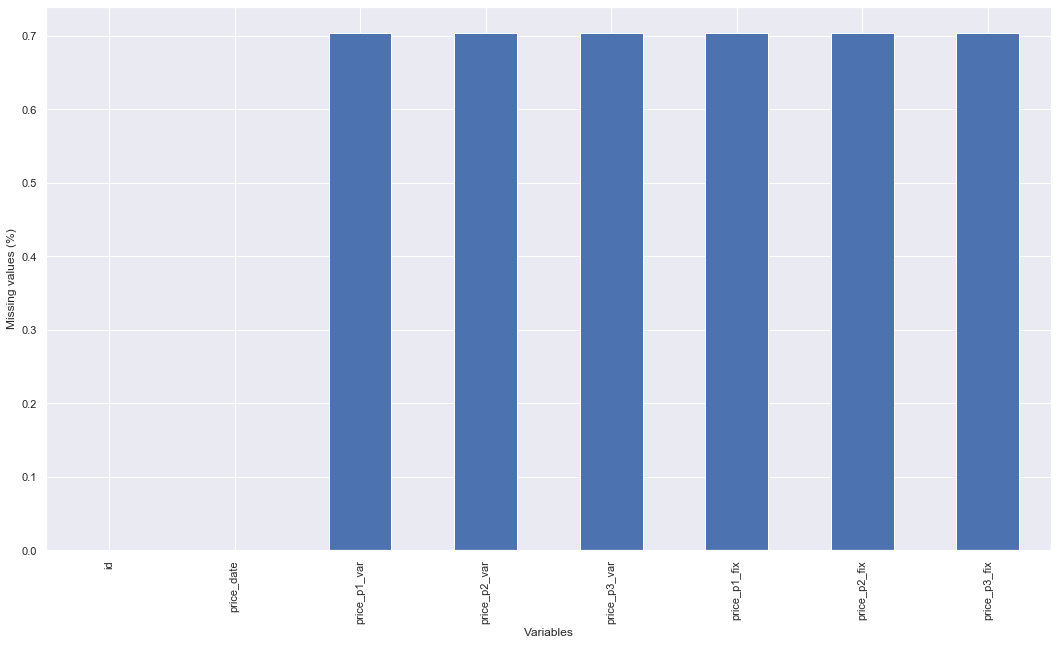

In [35]:
# Dealing with missing historical prices
missing_data_percentage = second_data.isnull().sum()/len(second_data.index)*100
missing_data_percentage.plot(kind="bar", figsize=(18,10))
# Set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

In [36]:
# Filling missing historical data with the median
second_data.loc[second_data["price_p1_var"].isnull(),"price_p1_var"] = second_data["price_p1_var"].median()
second_data.loc[second_data["price_p2_var"].isnull(),"price_p2_var"] = second_data["price_p2_var"].median()
second_data.loc[second_data["price_p3_var"].isnull(),"price_p3_var"] = second_data["price_p3_var"].median()
second_data.loc[second_data["price_p1_fix"].isnull(),"price_p1_fix"] = second_data["price_p1_fix"].median()
second_data.loc[second_data["price_p2_fix"].isnull(),"price_p2_fix"] = second_data["price_p2_fix"].median()
second_data.loc[second_data["price_p3_fix"].isnull(),"price_p3_fix"] = second_data["price_p3_fix"].median()

## Formatting dates

In [37]:
joint_data["date_activ"] = pd.to_datetime(joint_data["date_activ"], format='%Y-%m-%d')
joint_data["date_end"] = pd.to_datetime(joint_data["date_end"], format='%Y-%m-%d')
joint_data["date_modif_prod"] = pd.to_datetime(joint_data["date_modif_prod"], format='%Y-%m-%d')
joint_data["date_renewal"] = pd.to_datetime(joint_data["date_renewal"], format='%Y-%m-%d')

In [38]:
second_data["price_date"] = pd.to_datetime(second_data["price_date"], format='%m/%d/%Y')

In [39]:
second_data.dtypes 

id                      object
price_date      datetime64[ns]
price_p1_var           float64
price_p2_var           float64
price_p3_var           float64
price_p1_fix           float64
price_p2_fix           float64
price_p3_fix           float64
dtype: object

## Negative Data

In [40]:
second_data.describe(include='all')

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
unique,16096,12,NaN,NaN,NaN,NaN,NaN,NaN
top,2c8fba31407b3b646132cd02d02e8fdf,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,16094,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,NaN,NaN,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,NaN,NaN,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,NaN,NaN,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000


In [41]:
second_data.loc[second_data["price_p1_fix"] < 0,"price_p1_fix"] = second_data["price_p1_fix"].median()
second_data.loc[second_data["price_p2_fix"] < 0,"price_p2_fix"] = second_data["price_p2_fix"].median()
second_data.loc[second_data["price_p3_fix"] < 0,"price_p3_fix"] = second_data["price_p3_fix"].median()

### Pickling our data to be saved to disk, in order to continue working on it later on

In [42]:
pd.to_pickle(joint_data, 'PICKLE_FirstData_DIR')
pd.to_pickle(second_data, 'PICKLE_HistoryPrice_DIR')

# Feature Engineering

In [43]:
mean_year = second_data.groupby(["id"]).mean().reset_index()

In [44]:
mean_6m = second_data[second_data["price_date"] > "6/1/2015"].groupby(["id"]).mean().reset_index()

In [45]:
mean_3m = second_data[second_data["price_date"] > "10/1/2015"].groupby(["id"]).mean().reset_index()

In [46]:
mean_year.head()

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [47]:
second_data.head() 

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [48]:
mean_3m = second_data[second_data["price_date"] > "2015-10-01"].groupby(["id"]).mean().reset_index()

In [49]:
mean_3m

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000
...,...,...,...,...,...,...,...
16090,ffef185810e44254c3a4c6395e6b4d8a,0.112488,0.094804,0.068829,40.728885,24.43733,16.291555
16091,fffac626da707b1b5ab11e8431a4d0a2,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000
16092,fffc0cacd305dd51f316424bbb08d1bd,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555
16093,fffe4f5646aa39c7f97f95ae2679ce64,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555


In [50]:
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
                                                 "price_p2_var": "mean_year_price_p2_var",
                                                 "price_p3_var": "mean_year_price_p3_var",
                                                 "price_p1_fix": "mean_year_price_p1_fix",
                                                 "price_p2_fix": "mean_year_price_p2_fix",
                                                 "price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [51]:
mean_6m = mean_6m.rename(index=str, columns={"price_p1_var": "mean_6m_price_p1_var",
                                             "price_p2_var": "mean_6m_price_p2_var",
                                             "price_p3_var": "mean_6m_price_p3_var",
                                             "price_p1_fix": "mean_6m_price_p1_fix",
                                             "price_p2_fix": "mean_6m_price_p2_fix",
                                             "price_p3_fix": "mean_6m_price_p3_fix",})
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

In [52]:
mean_3m = mean_3m.rename(index=str, columns={"price_p1_var": "mean_3m_price_p1_var",
                                             "price_p2_var": "mean_3m_price_p2_var",
                                             "price_p3_var": "mean_3m_price_p3_var",
                                             "price_p1_fix": "mean_3m_price_p1_fix",
                                             "price_p2_fix": "mean_3m_price_p2_fix",
                                             "price_p3_fix": "mean_3m_price_p3_fix",})
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

In [53]:
features = mean_year

In [54]:
joint_data["tenure"] = ((joint_data["date_end"]-joint_data["date_activ"])/ np.timedelta64(1, "Y")).astype(int)

In [55]:
tenure = joint_data[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

In [56]:
tenure

churn,0,1
tenure,,
0,1.0,NaN
2,262.0,40.0
3,1178.0,193.0
4,3632.0,535.0
5,3010.0,297.0
6,3052.0,269.0
7,2649.0,210.0
8,162.0,11.0
9,94.0,2.0


In [57]:
tenure.sum(axis=1)

tenure
0        1.0
2      302.0
3     1371.0
4     4167.0
5     3307.0
6     3321.0
7     2859.0
8      173.0
9       96.0
10      66.0
11     226.0
12     158.0
13      47.0
15       1.0
16       1.0
dtype: float64

In [58]:
tenure

churn,0,1
tenure,,
0,1.0,NaN
2,262.0,40.0
3,1178.0,193.0
4,3632.0,535.0
5,3010.0,297.0
6,3052.0,269.0
7,2649.0,210.0
8,162.0,11.0
9,94.0,2.0


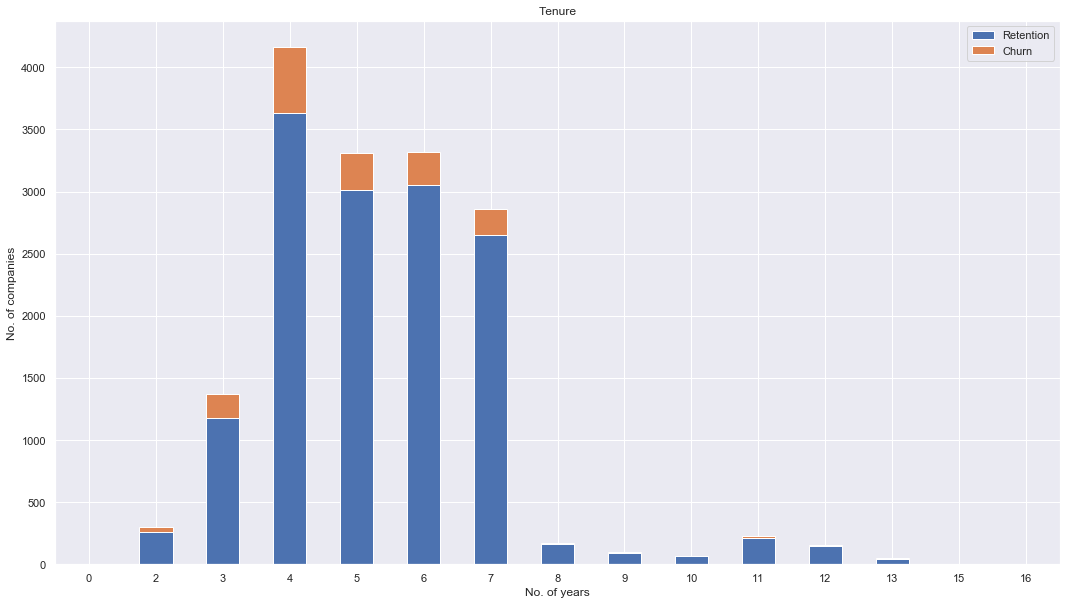

In [59]:
tenure.plot(kind="bar",
                       figsize=(18,10),
                       stacked=True,
                       rot=0,
                       title= "Tenure")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

In [60]:
def convert_months(reference_date, dataframe, column):
     """
     Input a column with timedeltas and return months
     """
     time_delta = REFERENCE_DATE - dataframe[column]
     months = (time_delta / np.timedelta64(1, "M")).astype(int)
     return months

In [61]:
REFERENCE_DATE = datetime.datetime(2016,1,1)

In [62]:
joint_data["months_activ"] = convert_months(REFERENCE_DATE, joint_data, "date_activ")
joint_data["months_to_end"] = -convert_months(REFERENCE_DATE, joint_data, "date_end")
joint_data["months_modif_prod"] = convert_months(REFERENCE_DATE, joint_data, "date_modif_prod")
joint_data["months_renewal"] = convert_months(REFERENCE_DATE, joint_data, "date_renewal")


In [63]:
def plot_churn_by_month(dataframe, column, fontsize_=11):
     """
     Plot churn distribution by monthly variable
     """
     temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
     temp.plot(kind="bar",
     figsize=(18,10),
     stacked=True,
     rot=0,
     title= column)
     # Rename legend
     plt.legend(["Retention", "Churn"], loc="upper right")
     # Labels
     plt.ylabel("No. of companies")
     plt.xlabel("No. of months")
     # Set xlabel fontsize
     plt.xticks(fontsize=fontsize_)
     plt.show()


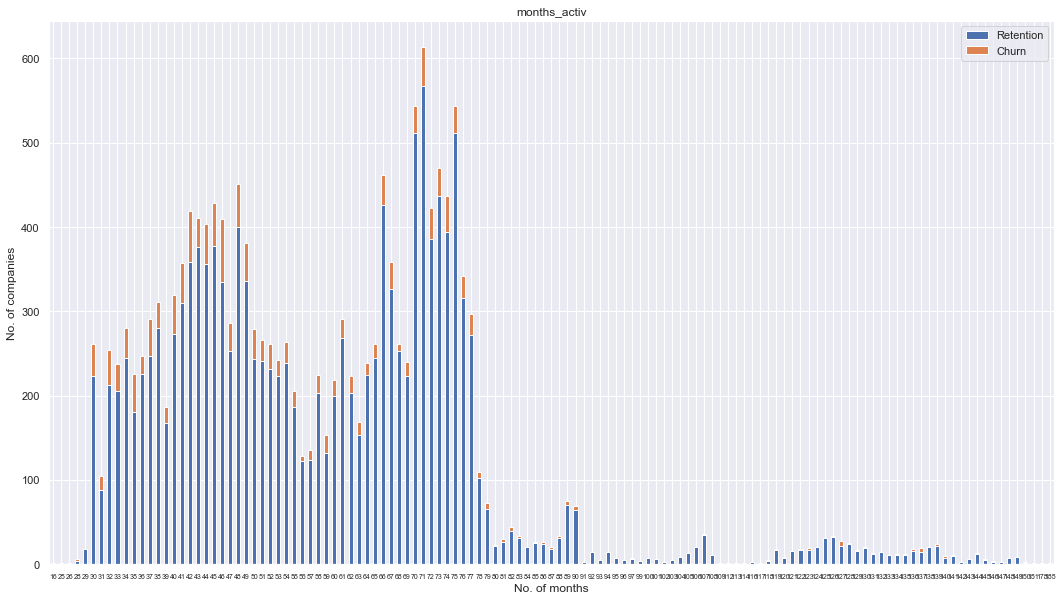

In [64]:
plot_churn_by_month(joint_data, "months_activ", 7)

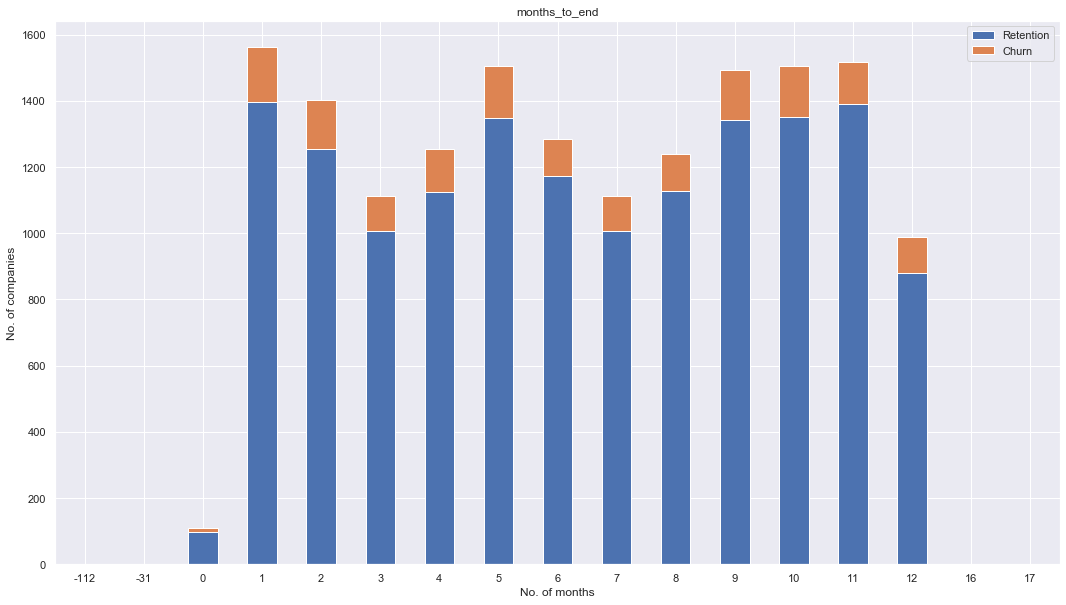

In [65]:
plot_churn_by_month(joint_data, "months_to_end")

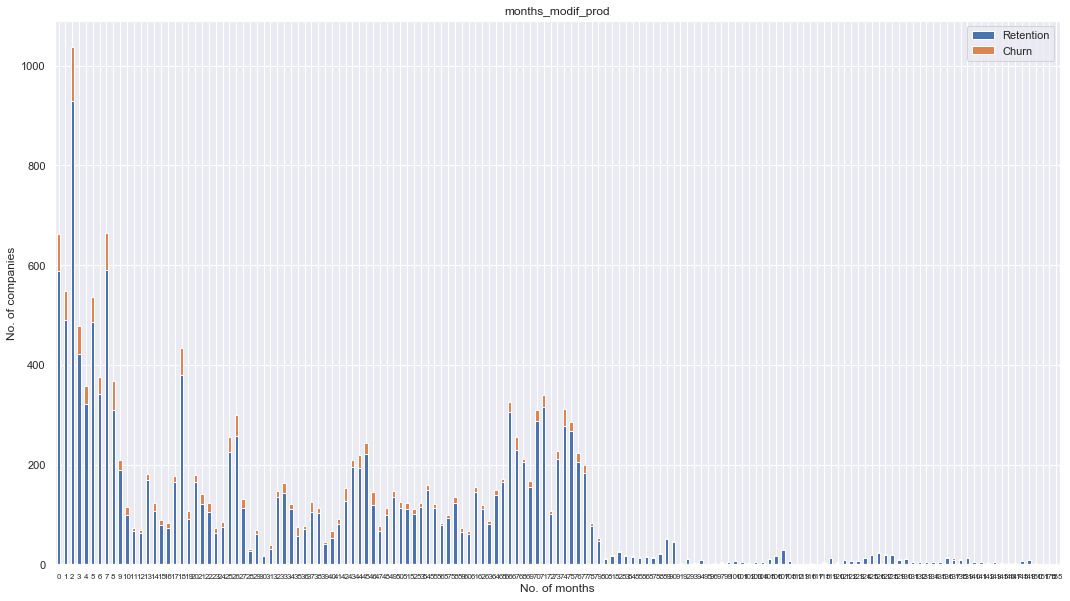

In [66]:
plot_churn_by_month(joint_data, "months_modif_prod", 8)

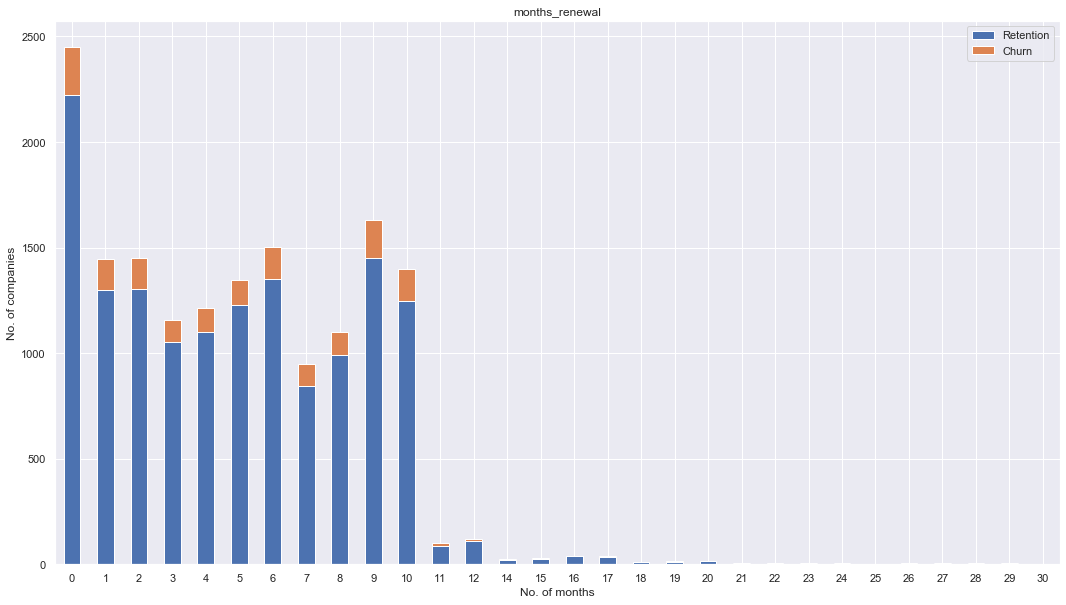

In [67]:
plot_churn_by_month(joint_data, "months_renewal")

In [68]:
joint_data.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

In [69]:
# Transforming Boolean Data
joint_data["has_gas"]=joint_data["has_gas"].replace(["t", "f"],[1,0])

In [70]:
joint_data["has_gas"]

0        0
1        1
2        0
3        0
4        0
        ..
16091    1
16092    0
16093    0
16094    0
16095    0
Name: has_gas, Length: 16096, dtype: int64

## Categorical and dummy variables

In [71]:
joint_data["channel_sales"] = joint_data["channel_sales"].fillna("null_values_channel")

In [72]:
joint_data["channel_sales"] = joint_data["channel_sales"].astype("category")

In [73]:
pd.DataFrame({"Samples in category": joint_data["channel_sales"].value_counts()})

,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


In [74]:
categories_channel = pd.get_dummies(joint_data["channel_sales"], prefix = "channel")

In [75]:
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]

In [76]:
categories_channel.head()

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [77]:
categories_channel.drop(columns=["channel_nul"],inplace=True)

In [78]:
joint_data["origin_up"] = joint_data["origin_up"].fillna("null_values_origin")

In [79]:
joint_data.columns

Index(['id', 'activity_new', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'origin_up', 'pow_max', 'churn', 'tenure', 'months_activ',
       'months_to_end', 'months_modif_prod', 'months_renewal'],
      dtype='object')

In [80]:
joint_data["origin_up"] = joint_data["origin_up"].astype("category")

In [81]:
pd.DataFrame({"Samples in category": joint_data["origin_up"].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [82]:
# Create dummy variables
categories_origin = pd.get_dummies(joint_data["origin_up"], prefix = "origin")
# Rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]

In [83]:
categories_origin.head(5)

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [84]:
categories_origin.drop(columns=["origin_nul"],inplace=True)

In [85]:
joint_data["activity_new"] = joint_data["activity_new"].fillna("null_values_activity")
categories_activity = pd.DataFrame({"Activity samples":joint_data["activity_new"].value_counts()})
categories_activity

,Activity samples
null_values_activity,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
...,...
ikiucmkuisupefxcxfxxulkpwssppfuo,1
eckbfdkkkfoxpeffpacbikwpeicksulu,1
eamiapdokbfumefocubefudcowecllla,1
wwbwooasdidfidwldbxdxkamdkaacaxd,1


In [86]:
# Get the categories with less than 75 samples
to_replace = list(categories_activity[categories_activity["Activity samples"] <= 75].index)
# Replace them with `null_values_categories`
joint_data["activity_new"]=joint_data["activity_new"].replace(to_replace,"null_values_activity")

In [87]:
# Create dummy variables
categories_activity = pd.get_dummies(joint_data["activity_new"], prefix = "activity")
# Rename columns for simplicity
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]

In [88]:
categories_activity.drop(columns=["activity_nul"],inplace=True)

In [89]:
# Remove negative values
joint_data.loc[joint_data.cons_12m < 0,"cons_12m"] = np.nan
joint_data.loc[joint_data.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
joint_data.loc[joint_data.cons_last_month < 0,"cons_last_month"] = np.nan
joint_data.loc[joint_data.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
joint_data.loc[joint_data.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
joint_data.loc[joint_data.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
joint_data.loc[joint_data.imp_cons < 0,"imp_cons"] = np.nan

In [90]:
# Apply log10 transformation
joint_data["cons_12m"] = np.log10(joint_data["cons_12m"]+1)
joint_data["cons_gas_12m"] = np.log10(joint_data["cons_gas_12m"]+1)
joint_data["cons_last_month"] = np.log10(joint_data["cons_last_month"]+1)
joint_data["forecast_cons_12m"] = np.log10(joint_data["forecast_cons_12m"]+1)
joint_data["forecast_cons_year"] = np.log10(joint_data["forecast_cons_year"]+1)
joint_data["forecast_meter_rent_12m"] = np.log10(joint_data["forecast_meter_rent_12m"]+1)
joint_data["imp_cons"] = np.log10(joint_data["imp_cons"]+1)

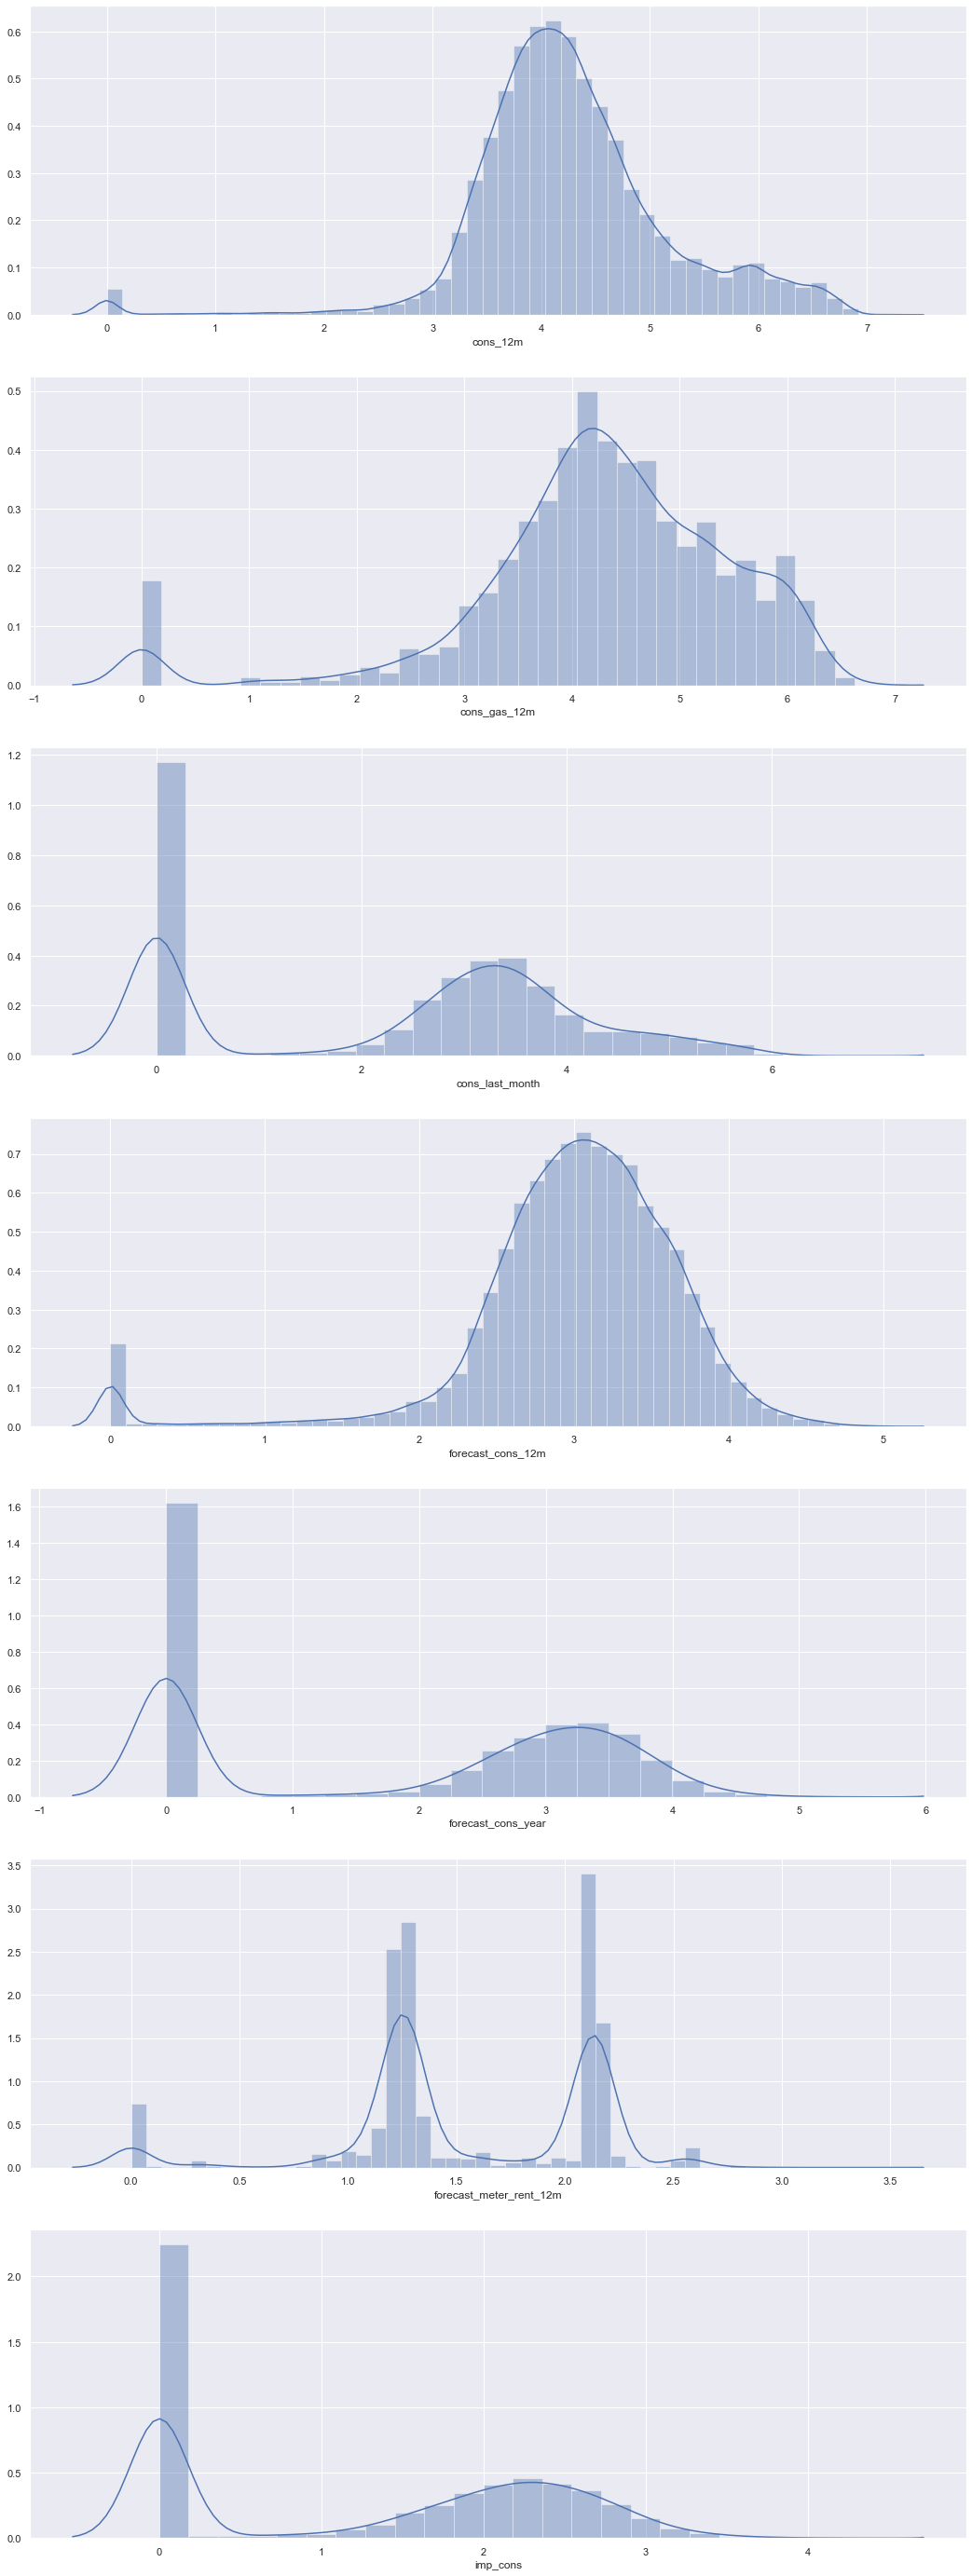

In [91]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((joint_data["cons_12m"].dropna()), ax=axs[0])
sns.distplot((joint_data[joint_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((joint_data["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((joint_data["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((joint_data["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((joint_data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((joint_data["imp_cons"].dropna()), ax=axs[6])
plt.show()

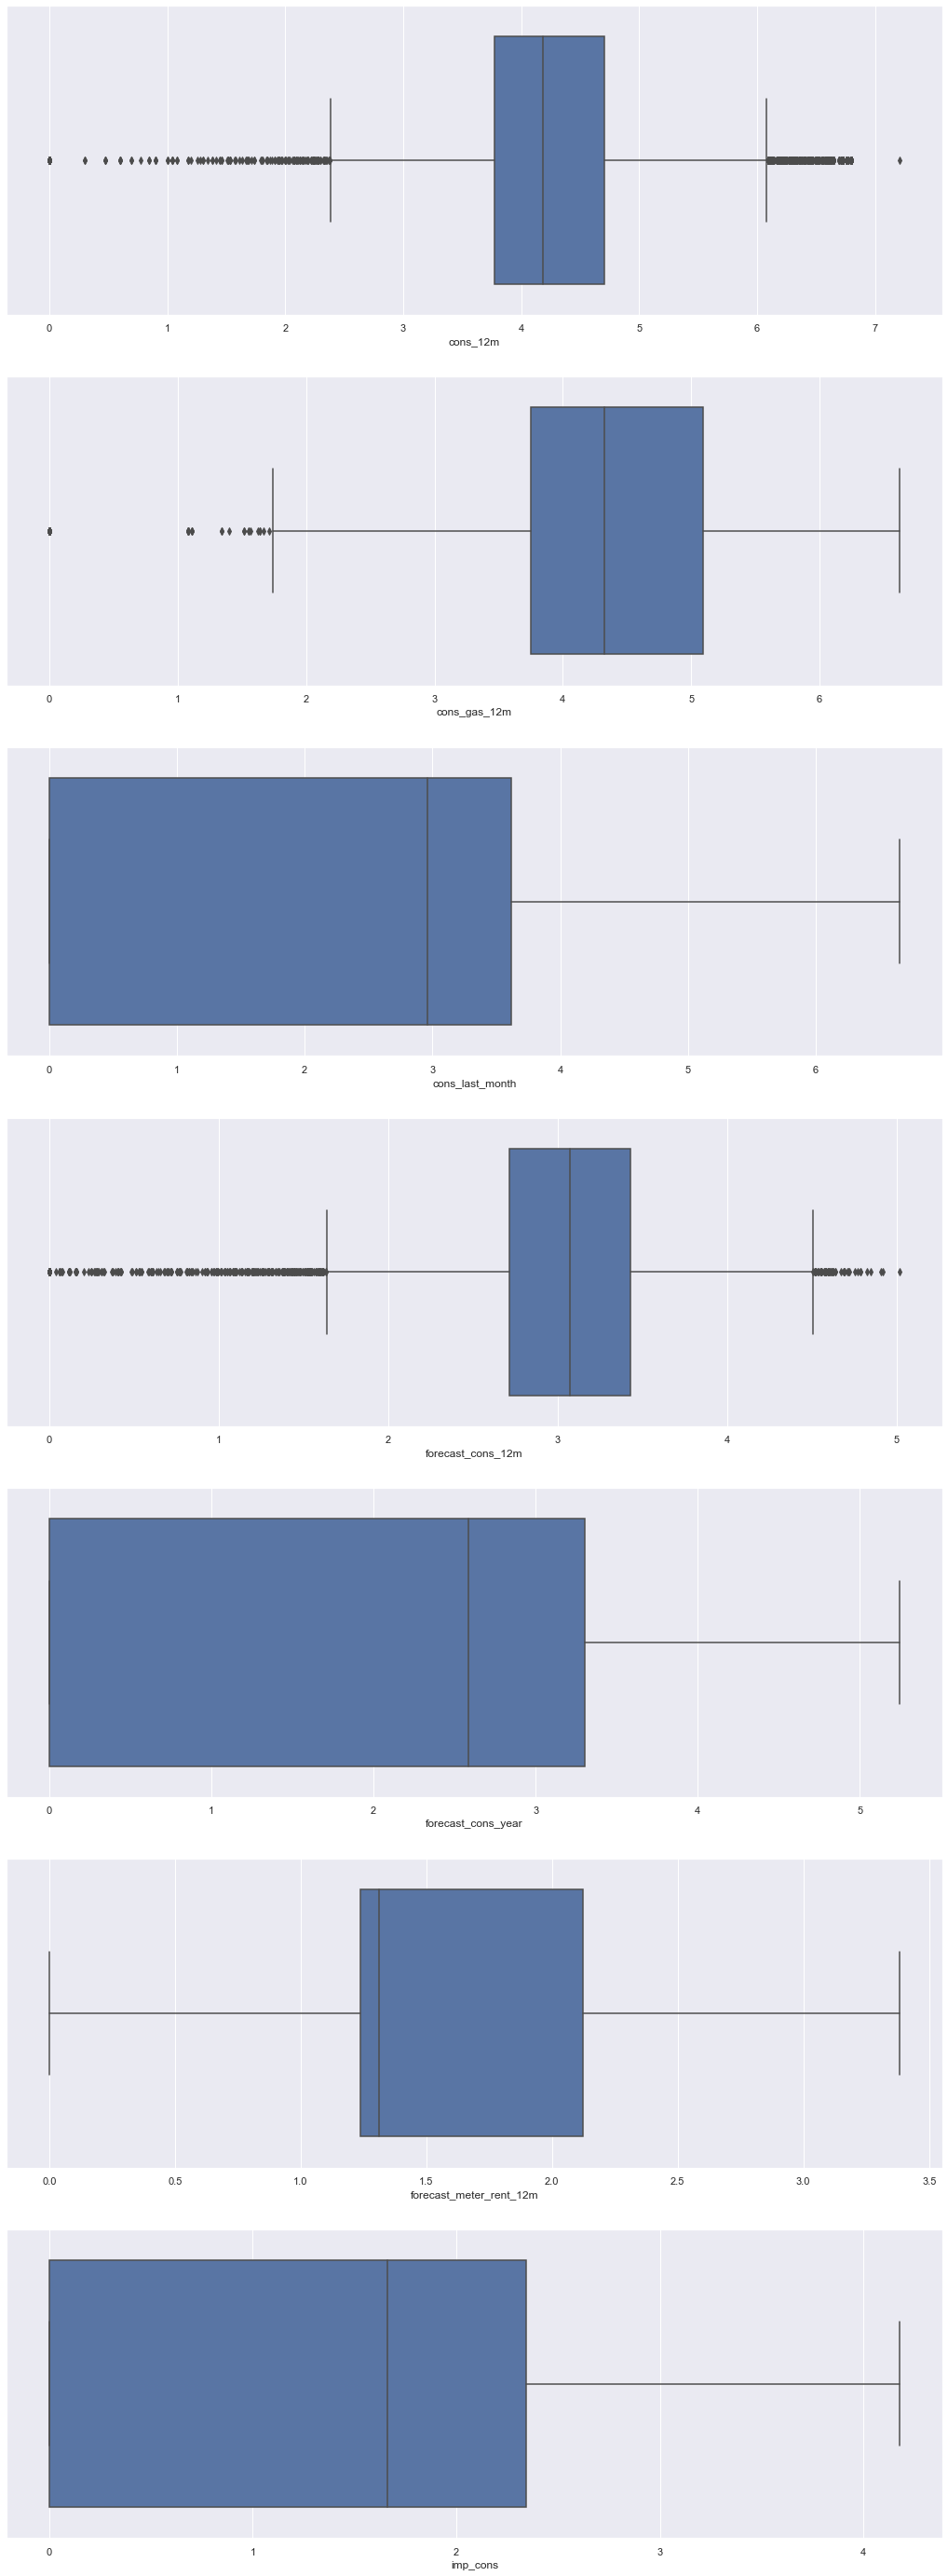

In [92]:
 fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((joint_data["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((joint_data[joint_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((joint_data["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((joint_data["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((joint_data["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((joint_data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((joint_data["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [93]:
joint_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
count,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,15970.000000,16092.000000,15970.000000,15970.000000,15970.000000,16096.000000,16069.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.283812,0.800300,2.359281,3.006826,1.869956,0.991547,1.549610,0.135901,0.052951,43.533496,0.184145,1.305021,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093,5.329958,58.929858,6.376615,35.741240,4.924640
std,0.915265,1.748833,1.789067,0.709778,1.612963,5.160969,0.589394,0.026252,0.048617,5.212252,0.387615,1.165532,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796,1.749248,20.125024,3.633479,30.609746,3.812127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,0.000000,0.000000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,16.000000,-112.000000,0.000000,0.000000
25%,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,0.000000,40.606701,0.000000,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000,4.000000,44.000000,3.000000,7.000000,2.000000
50%,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,1.310481,0.142881,0.086163,44.311378,0.000000,1.662380,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,5.000000,57.000000,6.000000,29.000000,5.000000
75%,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,2.122126,0.146348,0.098837,44.311378,0.000000,2.341118,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000
max,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,3.382502,0.273963,0.195975,59.444710,1.000000,4.177357,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,16.000000,185.000000,17.000000,185.000000,30.000000


# High Correlation Variables

In [94]:
correlation = features.corr()

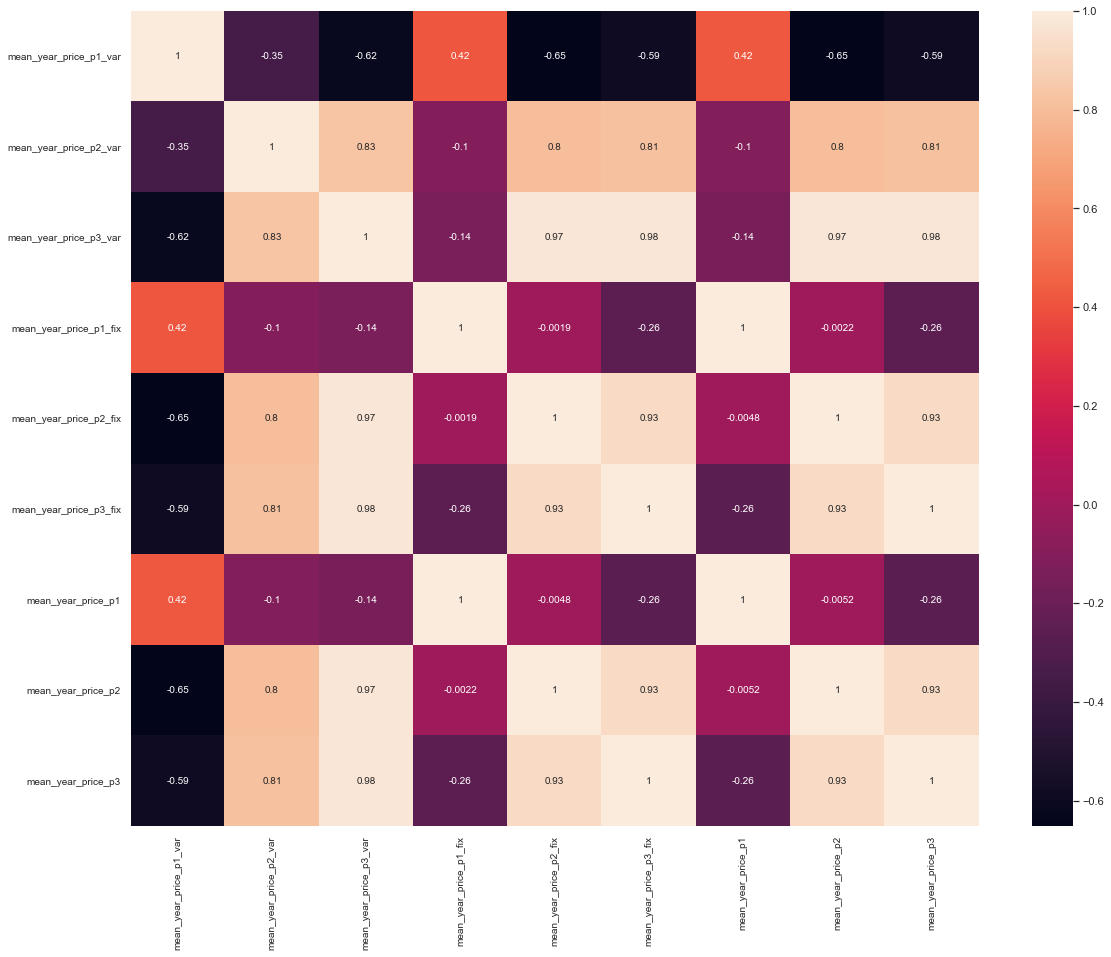

In [95]:
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

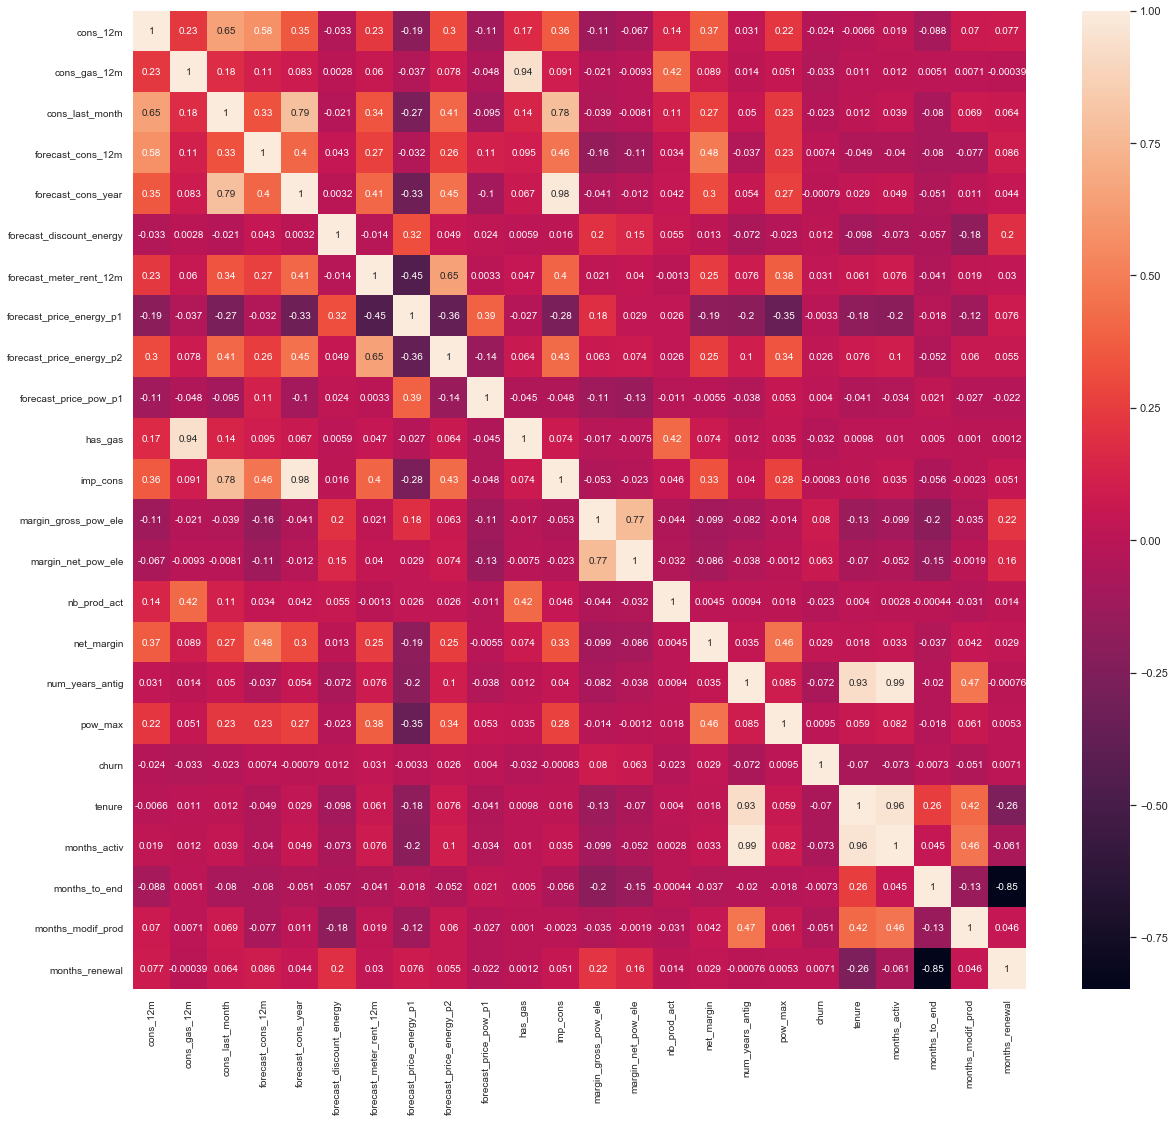

In [96]:
correlation = joint_data.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [97]:
joint_data.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

# Removing Outliers

In [98]:
def replace_outliers_z_score(dataframe, column, Z=3):
     """
     Replace outliers with the mean values using the Z score.
     Nan values are also replaced with the mean values.
     Parameters
     ----------
     dataframe : pandas dataframe
     Contains the data where the outliers are to be found
     column : str
     Usually a string with the name of the column

     Returns
     -------
     Dataframe
     With outliers under the lower and above the upper bound removed
     """
     from scipy.stats import zscore

     df = dataframe.copy(deep=True)
     df.dropna(inplace=True, subset=[column])

     # Calculate mean without outliers
     df["zscore"] = zscore(df[column])
     mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

     # Replace with mean values
     dataframe[column] = dataframe[column].fillna(mean_)
     dataframe["zscore"] = zscore(dataframe[column])
     no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
     dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

     # Print message
     print("Replaced:", no_outliers, " outliers in ", column)
     return dataframe.drop(columns="zscore")

In [99]:
for c in features.columns:
     if c != "id":
         features = replace_outliers_z_score(features,c)

Replaced: 276  outliers in  mean_year_price_p1_var
Replaced: 0  outliers in  mean_year_price_p2_var
Replaced: 0  outliers in  mean_year_price_p3_var
Replaced: 120  outliers in  mean_year_price_p1_fix
Replaced: 0  outliers in  mean_year_price_p2_fix
Replaced: 0  outliers in  mean_year_price_p3_fix
Replaced: 122  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [100]:
features.reset_index(drop=True, inplace=True)

# Finding Outliers

In [101]:
def _find_outliers_iqr(dataframe, column):
     """
     Find outliers using the 1.5*IQR rule.
     Parameters
     ----------
     dataframe : pandas dataframe
     Contains the data where the outliers are to be found
     column : str
     Usually a string with the name of the column

     Returns
     -------
     Dict
     With the values of the iqr, lower_bound and upper_bound
     """
     col = sorted(dataframe[column])
     q1, q3= np.percentile(col,[25,75])
     iqr = q3 - q1
     lower_bound = q1 -(1.5 * iqr)
     upper_bound = q3 +(1.5 * iqr)
     results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
     return results
def remove_outliers_iqr(dataframe, column):
     """
     Remove outliers using the 1.5*IQR rule.
     Parameters
     ----------
     dataframe : pandas dataframe
     Contains the data where the outliers are to be found
     column : str
     Usually a string with the name of the column

     Returns
     -------
     Dataframe
     With outliers under the lower and above the upper bound removed
     """

     outliers = _find_outliers_iqr(dataframe, column)
     removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
     (dataframe[column] > outliers["upper_bound"])].shape

     dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
     (dataframe[column] < outliers["upper_bound"])]
     print("Removed:", removed[0], " outliers")
     return dataframe
def remove_outliers_z_score(dataframe, column, Z=3):
     """
     Remove outliers using the Z score. Values with more than 3 are removed.
     Parameters
     ----------
     dataframe : pandas dataframe
     Contains the data where the outliers are to be found
     column : str
     Usually a string with the name of the column

     Returns
     -------
     Dataframe
     With outliers under the lower and above the upper bound removed
     """
     from scipy.stats import zscore

     dataframe["zscore"] = zscore(dataframe[column])

     removed = dataframe[(dataframe["zscore"] < -Z) |
     (dataframe["zscore"] > Z)].shape

     dataframe = dataframe[(dataframe["zscore"] > -Z) &
     (dataframe["zscore"] < Z)]

     print("Removed:", removed[0], " outliers of ", column)

     return dataframe.drop(columns="zscore")


def replace_outliers_z_score(dataframe, column, Z=3):
     """
     Replace outliers with the mean values using the Z score.
     Nan values are also replaced with the mean values.
     Parameters
     ----------
     dataframe : pandas dataframe
     Contains the data where the outliers are to be found
     column : str
     Usually a string with the name of the column

     Returns
     -------
     Dataframe
     With outliers under the lower and above the upper bound removed
     """
     from scipy.stats import zscore

     df = dataframe.copy(deep=True)
     df.dropna(inplace=True, subset=[column])

     # Calculate mean without outliers
     df["zscore"] = zscore(df[column])
     mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

     # Replace with mean values
     no_outliers = dataframe[column].isnull().sum()
     dataframe[column] = dataframe[column].fillna(mean_)
     dataframe["zscore"] = zscore(dataframe[column])
     dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

     # Print message
     print("Replaced:", no_outliers, " outliers in ", column)
     return dataframe.drop(columns="zscore")

In [102]:
joint_data = replace_outliers_z_score(joint_data,"cons_12m")
joint_data = replace_outliers_z_score(joint_data,"cons_gas_12m")
joint_data = replace_outliers_z_score(joint_data,"cons_last_month")
joint_data = replace_outliers_z_score(joint_data,"forecast_cons_12m")
#joint_data = replace_outliers_z_score(joint_data,"forecast_cons_year")
joint_data = replace_outliers_z_score(joint_data,"forecast_discount_energy")
joint_data = replace_outliers_z_score(joint_data,"forecast_meter_rent_12m")
joint_data = replace_outliers_z_score(joint_data,"forecast_price_energy_p1")
joint_data = replace_outliers_z_score(joint_data,"forecast_price_energy_p2")
joint_data = replace_outliers_z_score(joint_data,"forecast_price_pow_p1")
joint_data = replace_outliers_z_score(joint_data,"imp_cons")
joint_data = replace_outliers_z_score(joint_data,"margin_gross_pow_ele")
joint_data = replace_outliers_z_score(joint_data,"margin_net_pow_ele")
joint_data = replace_outliers_z_score(joint_data,"net_margin")
joint_data = replace_outliers_z_score(joint_data,"pow_max")
joint_data = replace_outliers_z_score(joint_data,"months_activ")
joint_data = replace_outliers_z_score(joint_data,"months_to_end")
joint_data = replace_outliers_z_score(joint_data,"months_modif_prod")
joint_data = replace_outliers_z_score(joint_data,"months_renewal")

Replaced: 27  outliers in  cons_12m
Replaced: 6  outliers in  cons_gas_12m
Replaced: 46  outliers in  cons_last_month
Replaced: 41  outliers in  forecast_cons_12m
Replaced: 126  outliers in  forecast_discount_energy
Replaced: 4  outliers in  forecast_meter_rent_12m
Replaced: 126  outliers in  forecast_price_energy_p1
Replaced: 126  outliers in  forecast_price_energy_p2
Replaced: 126  outliers in  forecast_price_pow_p1
Replaced: 27  outliers in  imp_cons
Replaced: 13  outliers in  margin_gross_pow_ele
Replaced: 13  outliers in  margin_net_pow_ele
Replaced: 15  outliers in  net_margin
Replaced: 3  outliers in  pow_max
Replaced: 0  outliers in  months_activ
Replaced: 0  outliers in  months_to_end
Replaced: 0  outliers in  months_modif_prod
Replaced: 0  outliers in  months_renewal


In [103]:
joint_data.reset_index(drop=True, inplace=True)

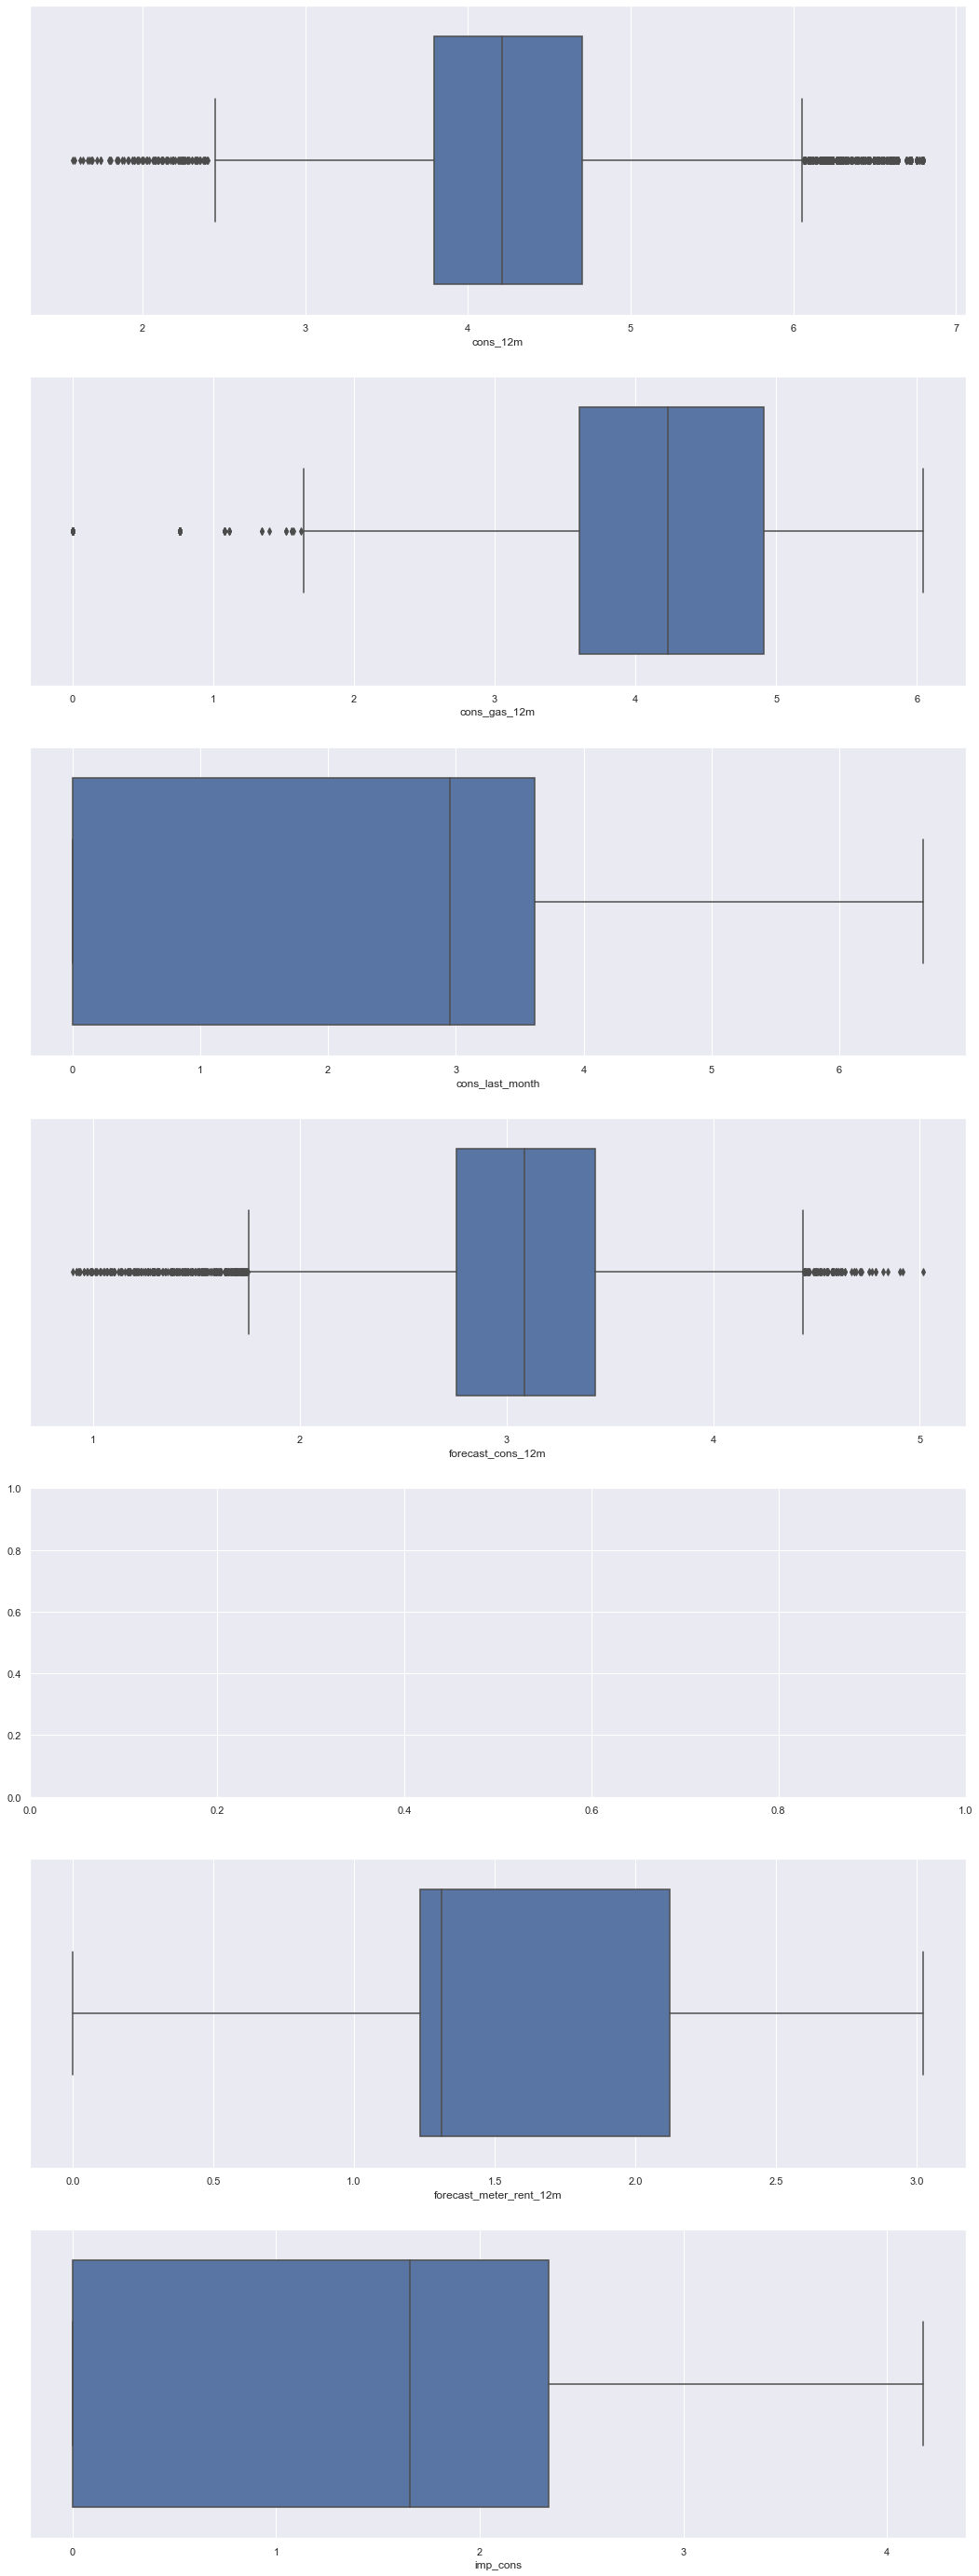

In [104]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((joint_data["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((joint_data[joint_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((joint_data["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((joint_data["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((joint_data["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((joint_data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((joint_data["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [105]:
train = pd.merge(joint_data, second_data, on="id")

In [106]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,forecast_cons_12m
7,forecast_discount_energy
8,forecast_meter_rent_12m
9,forecast_price_energy_p1


In [107]:
categories_activity.head()

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [108]:
train = train.join(categories_activity)

In [109]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,forecast_cons_12m
7,forecast_discount_energy
8,forecast_meter_rent_12m
9,forecast_price_energy_p1


In [110]:
categories_channel

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi
0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
16091,0,0,0,1,0,0,0
16092,0,0,0,1,0,0,0
16093,0,0,0,1,0,0,0
16094,0,0,0,1,0,0,0


In [111]:
train = train.join(categories_channel)

In [112]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,forecast_cons_12m
7,forecast_discount_energy
8,forecast_meter_rent_12m
9,forecast_price_energy_p1


In [113]:
train = train.join(categories_origin)

In [114]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,forecast_cons_12m
7,forecast_discount_energy
8,forecast_meter_rent_12m
9,forecast_price_energy_p1


In [115]:
to_drop = ['origin_up','channel_sales', 'activity_new', 'price_date', 'price_p1_var', 'price_p2_var',
           'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix' ]
train.drop(to_drop,inplace =True,axis =1)

In [116]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,cons_12m
2,cons_gas_12m
3,cons_last_month
4,forecast_cons_12m
5,forecast_discount_energy
6,forecast_meter_rent_12m
7,forecast_price_energy_p1
8,forecast_price_energy_p2
9,forecast_price_pow_p1


In [117]:
mean_year

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,zscore
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,-0.689889
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.223460
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,1.676179
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,-0.920678
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.285458
...,...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752,-0.089279
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000,0.252833
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411,0.531610
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414,-0.709750


In [118]:
train = pd.merge(train, mean_year, on='id')

In [119]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,cons_12m
2,cons_gas_12m
3,cons_last_month
4,forecast_cons_12m
5,forecast_discount_energy
6,forecast_meter_rent_12m
7,forecast_price_energy_p1
8,forecast_price_energy_p2
9,forecast_price_pow_p1


In [120]:
train.drop(['zscore'], inplace =True, axis =1)

In [121]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,cons_12m
2,cons_gas_12m
3,cons_last_month
4,forecast_cons_12m
5,forecast_discount_energy
6,forecast_meter_rent_12m
7,forecast_price_energy_p1
8,forecast_price_energy_p2
9,forecast_price_pow_p1


## Modelling

In [122]:
y = train["churn"]
X = train.drop(labels = ["id","churn"],axis = 1)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1)
result = model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [124]:
def evaluate(model_, X_test_, y_test_):
     """
     Evaluate the accuracy, precision and recall of a model
     """

     # Get the model predictions
     prediction_test_ = model_.predict(X_test_)

     # Print the evaluation metrics as pandas dataframe
     results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test_, prediction_test_)],
     "Precision" : [metrics.precision_score(y_test_, prediction_test_)],
     "Recall" : [metrics.recall_score(y_test_, prediction_test_)]})

     # For a more detailed report
     #print(metrics.classification_report(y_test_, prediction_test_))
     return results

In [125]:
evaluate(model, X_test, y_test)

,Accuracy,Precision,Recall
0,0.980187,0.997138,0.802177


In [126]:
def calculate_roc_auc(model_, X_test_, y_test_):
     """
     Evaluate the roc-auc score
     """

     # Get the model predictions
     # Note that we are using the prediction for the class 1 -> churn
     prediction_test_ = model_.predict_proba(X_test_)[:,1]
     # Compute roc-auc
     fpr, tpr, thresholds = metrics.roc_curve(y_test_, prediction_test_)

     # Print the evaluation metrics as pandas dataframe
     score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
     return fpr, tpr, score
def plot_roc_auc(fpr,tpr):
     """
     Plot the Receiver Operating Characteristic from a list
     of true positive rates and false positive rates.
     """

     # Initialize plot
     f, ax = plt.subplots(figsize=(14,8))

     # Plot ROC
     roc_auc = metrics.auc(fpr, tpr)
     ax.plot(fpr, tpr, lw=2, alpha=0.3,
     label="AUC = %0.2f" % (roc_auc))
     # Plot the random line.
     plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
     label="Random", alpha=.8)

     # Fine tune and show the plot.
     ax.set_xlim([-0.05, 1.05])
     ax.set_ylim([-0.05, 1.05])
     ax.set_xlabel("False Positive Rate (FPR)")
     ax.set_ylabel("True Positive Rate (TPR)")
     ax.set_title("ROC-AUC")
     ax.legend(loc="lower right")
     plt.show()


In [127]:
fpr, tpr, auc_score = calculate_roc_auc(model, X_test, y_test)

In [128]:
auc_score

,ROC-AUC
0,0.999088


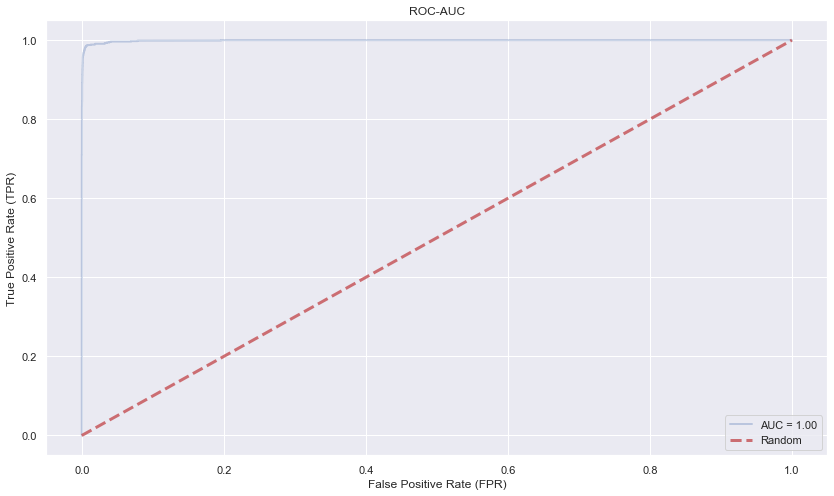

In [129]:
plot_roc_auc(fpr, tpr)
plt.show()

## Stratified K-fold

In [130]:
def plot_roc_curve(fprs, tprs):
     """
     Plot the Receiver Operating Characteristic from a list
     of true positive rates and false positive rates.
     """

     # Initialize useful lists + the plot axes.
     tprs_interp = []
     aucs = []
     mean_fpr = np.linspace(0, 1, 100)
     f, ax = plt.subplots(figsize=(18,10))

     # Plot ROC for each K-Fold + compute AUC scores.
     for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
         tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
         tprs_interp[-1][0] = 0.0
         roc_auc = metrics.auc(fpr, tpr)
         aucs.append(roc_auc)
         ax.plot(fpr, tpr, lw=2, alpha=0.3,
         label="ROC fold %d (AUC = %0.2f)" % (i, roc_auc))

     # Plot the luck line.
     plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
     label="Random", alpha=.8)

     # Plot the mean ROC.
     mean_tpr = np.mean(tprs_interp, axis=0)
     mean_tpr[-1] = 1.0
     mean_auc = metrics.auc(mean_fpr, mean_tpr)
     std_auc = np.std(aucs)
     ax.plot(mean_fpr, mean_tpr, color='b',
     label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
     lw=4, alpha=.8)

     # Plot the standard deviation around the mean ROC.
     std_tpr = np.std(tprs_interp, axis=0)
     tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
     tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
     ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=.2,
     label=r"$\pm$ 1 std. dev.")

     # Fine tune and show the plot.
     ax.set_xlim([-0.05, 1.05])
     ax.set_ylim([-0.05, 1.05])
     ax.set_xlabel("False Positive Rate (FPR)")
     ax.set_ylabel("True Positive Rate (TPR)")
     ax.set_title("ROC-AUC")
     ax.legend(loc="lower right")
     plt.show()
     return (f, ax)
def compute_roc_auc(model_, index):
     y_predict = model_.predict_proba(X.iloc[index])[:,1]
     fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
     auc_score = metrics.auc(fpr, tpr)
     return fpr, tpr, auc_score

In [131]:
cv = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
fprs, tprs, scores = [], [], []

In [132]:
for (train, test), i in zip(cv.split(X, y), range(5)):
     model.fit(X.iloc[train], y.iloc[train])
     _, _, auc_score_train = compute_roc_auc(model, train)
     fpr, tpr, auc_score = compute_roc_auc(model, test)
     scores.append((auc_score_train, auc_score))
     fprs.append(fpr)
     tprs.append(tpr)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:57:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

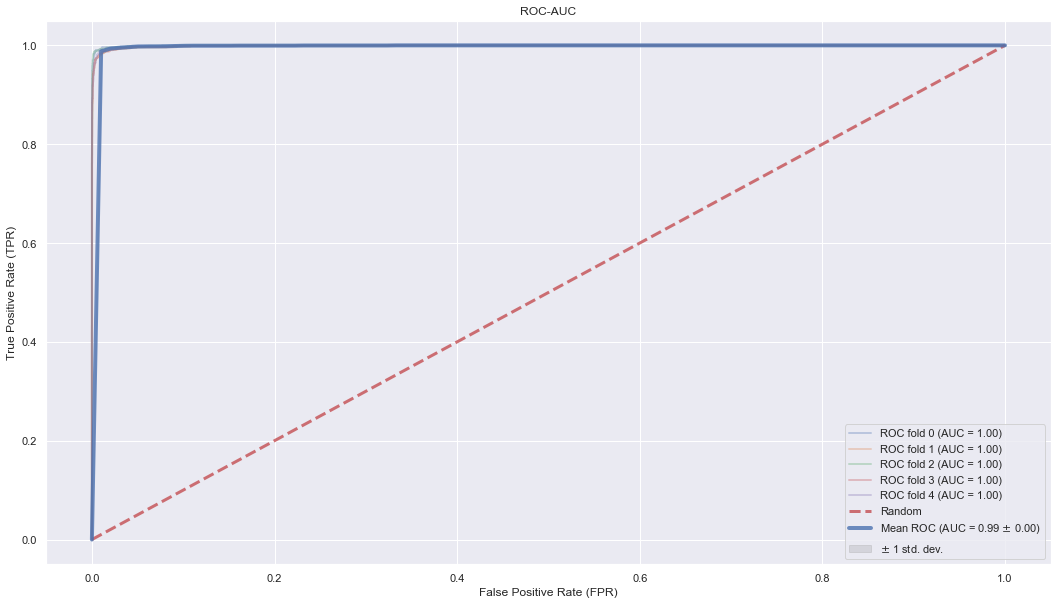

In [133]:
plot_roc_curve(fprs, tprs)
plt.show()

## Random Search Cross Validation

In [134]:
params = {
          'min_child_weight': [i for i in np.arange(1,15,1)],
          'gamma': [i for i in np.arange(0,6,0.5)],
          'subsample': [i for i in np.arange(0,1.1,0.1)],
          'colsample_bytree': [i for i in np.arange(0,1.1,0.1)],
          'max_depth': [i for i in np.arange(1,15,1)],
          'scale_pos_weight':[i for i in np.arange(1,15,1)],
          'learning_rate': [i for i in np.arange(0,0.15,0.01)],
          'n_estimators' : [i for i in np.arange(0,2000,100)]
         }

In [135]:
# Create model
xg = xgb.XGBClassifier(objective='binary:logistic',
                       silent=True, nthread=1)

In [136]:
# Random search of parameters, using 5
xg_random = RandomizedSearchCV(xg, param_distributions=params,
                                   n_iter=1, scoring= "roc_auc",
                                   n_jobs=4, cv=5, verbose=3, random_state=42)
# Fit the random search model
xg_random.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.7min
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  2.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'n_estimators': [0, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                       

In [137]:
best_random = xg_random.best_params_
best_random = {'subsample': 0.8,
    'scale_pos_weight': 1,
    'n_estimators': 1100,
    'min_child_weight': 1,
    'max_depth': 12,
    'learning_rate': 0.01,
    'gamma': 4.0,
    'colsample_bytree': 0.60}

In [138]:
# Create a model with the parameters found
model_random = xgb.XGBClassifier(objective='binary:logistic',
                                 silent=True, nthread=1, **best_random)
fprs, tprs, scores = [], [], []

In [139]:
for (train, test), i in zip(cv.split(X, y), range(5)):
     model_random.fit(X.iloc[train], y.iloc[train])
     _, _, auc_score_train = compute_roc_auc(model_random, train)
     fpr, tpr, auc_score = compute_roc_auc(model_random, test)
     scores.append((auc_score_train, auc_score))
     fprs.append(fpr)
     tprs.append(tpr)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

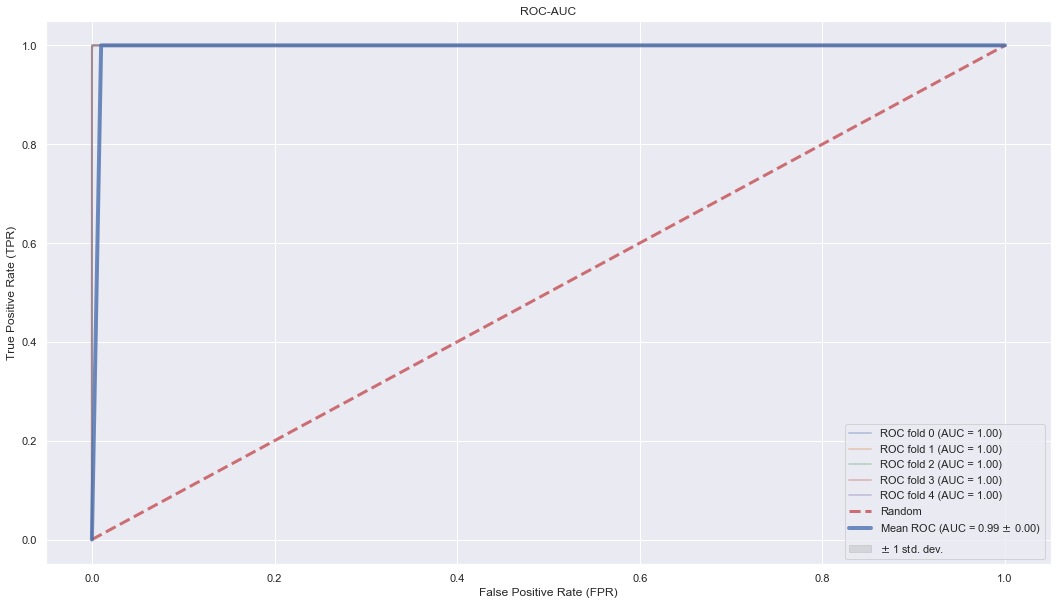

In [140]:
plot_roc_curve(fprs, tprs)
plt.show()